# Kaggle Project

## Describe Your Dataset

#### URL: https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset?resource=download

#### Task: binary classification
##### why do you do this?
- This data set is a collection of 2,000 Bike and Car images. While collecting these images, It was made sure that all types of bikes and cars are included in the image collection. This is because of the high Intra-variety of cars and bikes. That is, there are different types of cars and bikes, which make it a little tough task for the model because the model will also have to understand the high variety of bikes and cars. But if your model is able to understand the basic structure of a car and a bike, it will be able to distinguish between both classes.<br/>

##### what are you working on?
- We are trying to solve the **binary classification problem** of cars and bikes.

#### Datasets
- There are a total of 4000 images including car and bike images. The learning proceeds by dividing it into 6:2:2 in order of train, validation, and test. From a total of 4000 images, the train dataset consists of 2400, validation dataset 800, and test dataset 800, respectively. When dividing images into train validation tests, they are randomly selected and divided.<br/>


- Train dataset: **2400** images of cars and bikes
- Validation dataset: **800** images of cars and bikes
- Test dataset: **800** images of cars and bikes

#### Features(x):
- All car and bike images are in unprocessed state. So the images are of different sizes. For model learning, each image is resized and changed to a size of 224,224 before learning.<br/>


- feature (x) size: **(224(height),224(width))**
- feature (x) data type: torch.tensor
- batch size: **512**
- model input size: **(512(batch),3(channel),224(height),224(width))**
- model output size: **(512(batch),2(num_classes)**

#### Target(y):
- This problem is binary classification. So, label the car as 0 and the bike as 1, and proceed with learning.
- bike: 0 
- car: 1
- target y data type: torch.tensor
- batch size: **512**
- label size: **(512(batch),1(label))**
---

## Build Your Model

### Data preprocessing

- Car & Bike image들이 2개의 폴더에 나뉘어 저장되어 있음. 1개의 폴더로 합칠 필요가 있음.
- Car & Bike image들의 확장자명이 다양하고 filename도 동일하게 되어 있음.
- image들의 확장자명을 jpeg 동일하게 만들고 filename은 규칙을 만들어서 생성.<br/>

---
- 이전 결과
<img src="./describe_images/car_sample_1.jpeg" width="400px" height="500px" title="car_sample"/>
---
- 이후 결과
<img src="./describe_images/car_sample_2.jpeg" width="400px" height="500px" title="car_sample"/>
---

In [ ]:
import os
import shutil
# Car & Bike image들이 2개의 폴더에 나뉘어 저장되어 있음. 1개의 폴더로 합치기
# Bike image들의 확장자명들이 다양, 그 이유로 인해 확장자명을 jpeg로 통일
before_dir = "./Car-Bike-Dataset/Bike/"
Bike_name_list = os.listdir(before_dir)
after_dir = "./Car-Bike-Dataset/Car_and_Bike_jpeg/"

for index, filename in enumerate(Bike_name_list):
    before_dir_filename = before_dir + filename
    after_dir_filename = after_dir + "Bike_" + str(index) + ".jpeg"
    shutil.copyfile(before_dir_filename, after_dir_filename)
    
# Car image들의 확장자명들이 다양, 그 이유로 인해 확장자명을 jpeg로 통일
before_dir = "./Car-Bike-Dataset/Car/"
Bike_name_list = os.listdir(before_dir)
after_dir = "./Car-Bike-Dataset/Car_and_Bike_jpeg/"

for index, filename in enumerate(Bike_name_list):
    before_dir_filename = before_dir + filename
    after_dir_filename = after_dir + "Car_" + str(index) + ".jpeg"
    shutil.copyfile(before_dir_filename, after_dir_filename)

### annotation file configuration (train, validation, test)
- dataset class를 정의하고 dataloader object를 생성하기 위해서는 annotation file이 필요함
- annotation file은 csv file로 되어 있음. (all.csv, train.csv, validation.csv, test.csv)
    - all.csv - 4000개 annotation
    - train.csv - 2400개 annotation
    - validation.csv - 800개 annotation
    - test.csv - 800개 annotation
    - 각각 구성되어 있음
- 각 column은 ["image_filename", "vehicle_type", "vehicle_label"]로 구성되어 있음.<br/>

### why make an annotation file?
- dataset class에서 index를 통해서 annotation file에서 image filename, vehicle_label을 가져옴.
- image filename을 기준으로 image를 읽어드린 후 tensor로 변환. 그리고 모델의 x (input)으로 사용
- vehicle_label을 사용하여 model의 y (label) 으로 사용.

In [ ]:
import pandas as pd
# 학습을 진행하기 위해서 참고할만한 annotation file이 있어야 하기 때문에 annotation file 생성
filenames = os.listdir("./Car-Bike-Dataset/Car_and_Bike_jpeg/")
annotation_df = pd.DataFrame(columns=["image_filename","vehicle_type","vehicle_label"])
for index, filename in enumerate(filenames):
    if filename[0] == "B":
        vehicle_type = "Bike"
        vehicle_label = 0
    elif filename[0] == "C":
        vehicle_type = "Car"
        vehicle_label = 1
    tmp_df = pd.DataFrame(
        index=[index],
        data=[[filename,vehicle_type,vehicle_label]], 
        columns=["image_filename","vehicle_type","vehicle_label"]
    )
    annotation_df = pd.concat([annotation_df,tmp_df])

annotation_df = annotation_df.sample(frac=1)
annotation_df = annotation_df.reset_index(drop=True)
print(annotation_df)
annotation_df.to_csv("./annotation_file/all.csv", index=False)

print("="*45)
print('\033[92m' + '\033[1m' + "4000개의 Car & Bike annotation all" + '\033[0m')
print(annotation_df.shape)
print(annotation_df["vehicle_type"].value_counts().sort_index())
print("="*45)
################################################################################################
# train & validation & test annotation split
################################################################################################
train_df = annotation_df.sample(n=2400)
train_df.to_csv("./annotation_file/train.csv", index=False)
print('\033[92m' + '\033[1m' + "2400개의 Car & Bike annotation train" + '\033[0m')
print(train_df.shape)
print(train_df["vehicle_type"].value_counts().sort_index())
print("="*45)
annotation_df = annotation_df.drop(index=train_df.index)
################################################################################################
validation_df = annotation_df.sample(n=800)
validation_df.to_csv("./annotation_file/validation.csv", index=False)
print('\033[92m' + '\033[1m' + "800개의 Car & Bike annotation validation" + '\033[0m')
print(validation_df.shape)
print(validation_df["vehicle_type"].value_counts().sort_index())
print("="*45)
annotation_df = annotation_df.drop(index=validation_df.index)
################################################################################################
test_df = annotation_df
test_df.to_csv("./annotation_file/test.csv", index=False)
print('\033[92m' + '\033[1m' + "800개의 Car & Bike annotation test" + '\033[0m')
print(test_df.shape)
print(test_df["vehicle_type"].value_counts().sort_index())
print("="*45)
################################################################################################

In [1]:
import pandas as pd
annotation_df = pd.read_csv("./annotation_file/all.csv")
train_df = pd.read_csv("./annotation_file/train.csv")
validation_df = pd.read_csv("./annotation_file/validation.csv")
test_df = pd.read_csv("./annotation_file/test.csv")

print("="*45)
print('\033[92m' + '\033[1m' + "4000개의 Car & Bike annotation all" + '\033[0m')
print(annotation_df.shape)
print(annotation_df["vehicle_type"].value_counts().sort_index())
print("="*45)
################################################################################################
# train & validation & test annotation split
################################################################################################
print('\033[92m' + '\033[1m' + "2400개의 Car & Bike annotation train" + '\033[0m')
print(train_df.shape)
print(train_df["vehicle_type"].value_counts().sort_index())
print("="*45)
################################################################################################
print('\033[92m' + '\033[1m' + "800개의 Car & Bike annotation validation" + '\033[0m')
print(validation_df.shape)
print(validation_df["vehicle_type"].value_counts().sort_index())
print("="*45)
################################################################################################
print('\033[92m' + '\033[1m' + "800개의 Car & Bike annotation test" + '\033[0m')
print(test_df.shape)
print(test_df["vehicle_type"].value_counts().sort_index())
print("="*45)
################################################################################################

4000개의 Car & Bike annotation all
(4000, 3)
Bike    2000
Car     2000
Name: vehicle_type, dtype: int64
2400개의 Car & Bike annotation train
(2400, 3)
Bike    1187
Car     1213
Name: vehicle_type, dtype: int64
800개의 Car & Bike annotation validation
(800, 3)
Bike    408
Car     392
Name: vehicle_type, dtype: int64
800개의 Car & Bike annotation test
(800, 3)
Bike    405
Car     395
Name: vehicle_type, dtype: int64


### Define Dataset class
- 위에서 설명했던 바와 같이 dataset class를 정의.

### annotation type
- train, validation, test 중에서 하나를 선택하여 dataset class object를 생성할 수 있음.
- 3가지 option 중 하나를 선택하여 dataset class object를 생성하면 option에 맞는 annotation file을 선택.

### data augmentation - torchvision.transforms.AutoAugment()
- torchvision.transforms package에는 ImageNet에서 자주 사용된 data augmentation을 자동으로 적용하여 x(input) 데이터를 생성해주는 package가 있음.
- data가 많지 않는 상황에서 model의 일반화 성능을 올리기 위해서는 필요한 작업이라고 생각이 들어 augmenation 진행.
- train 할 때는 data augmentation을 진행하지만 validation, test 할 때는 data augmentation을 진행하지 않음.

### torchvision.transforms.Resize() & Normalize()
- train, validation, test를 진행할 때 모델의 input size를 맞추어 주어야 함.
- ImageNet에서 자주 사용되는 모델들의 input size가 224,224 또는 227,227 이라는 사실을 이번에 공부함.
- 본 과제의 목적도 사물(자동차 vs 바이크) 분류 문제이기 때문에 ImageNet task의 자주 사용되는 resize와 normalize를 참고하여 제작.

In [2]:
import pandas as pd
from torch.utils.data import Dataset
from torchvision.io import read_image, ImageReadMode
from torchvision import transforms

class Car_vs_Bike_Classification_Dataset(Dataset):
    def __init__(
        self,
        annotation_type: str, # ("all", "train", "validation", "test") 중에서 선택
        autoaugment: bool # ("True", "False") 중에서 선택
    ):
        if annotation_type == "all":
            self.annotation_df = pd.read_csv("./annotation_file/all.csv")
        elif annotation_type == "train":
            self.annotation_df = pd.read_csv("./annotation_file/train.csv")
        elif annotation_type == "validation":
            self.annotation_df = pd.read_csv("./annotation_file/validation.csv")
        elif annotation_type == "test":
            self.annotation_df = pd.read_csv("./annotation_file/test.csv")
        self.image_dir = "./Car-Bike-Dataset/Car_and_Bike_jpeg/"
        
        if autoaugment == True:
            self.autoaugment = transforms.AutoAugment()
        elif autoaugment == False:
            self.autoaugment = None
            
        self.transform = self.transform = transforms.Compose([
            transforms.Resize(size=(224,224), antialias=True),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
    def __len__(self):
        return self.annotation_df.shape[0]

    def __getitem__(self, idx):
        item = self.annotation_df.loc[idx]
        x = read_image(path=self.image_dir + item["image_filename"], mode=ImageReadMode.RGB)
        if self.autoaugment != None:
            x = self.autoaugment(x.type(torch.uint8)).float()
        x = self.transform(x.float())
        y = torch.tensor(item["vehicle_label"])
        return x,y
    
train_dataset = Car_vs_Bike_Classification_Dataset(annotation_type = "train", autoaugment=True)
validation_dataset = Car_vs_Bike_Classification_Dataset(annotation_type = "validation", autoaugment=False)
test_dataset = Car_vs_Bike_Classification_Dataset(annotation_type = "test", autoaugment=False)

### dataloader class object
- batch size는 현재 사용 중인 RTX3060 그래픽 카드의 메모리 사이즈를 가득 채울만큼 크게 잡음.
- batch size는 크면 클수록 성능이 좋아지는 경우도 있다고 함. 아닌 경우도 있음.
- shuffle = True로 설정. 이유는 모델의 일반화 성능이 좋아지는 경향이 있다고 함.
- drop_last = False로 설정. batch size로 전체 데이터를 나누면 나머지가 생기는 데 나머지를 drop 할지 아니면 그대로 진행할지를 결정.

In [3]:
from torch.utils.data import DataLoader

batch_size = 512
shuffle = True
drop_last = False

train_dataloader = DataLoader(
    dataset = train_dataset,
    batch_size = batch_size,
    shuffle = shuffle,
    drop_last = drop_last
)
validation_dataloader = DataLoader(
    dataset = validation_dataset,
    batch_size = batch_size,
    shuffle = shuffle,
    drop_last = drop_last
)
test_dataloader = DataLoader(
    dataset = test_dataset,
    batch_size = batch_size,
    shuffle = shuffle,
    drop_last = drop_last
)

### Model Construction
#### convolution layer construction
- conv2d(kernel_size=3, padding=1) -> relu -> batchnorm2d -> maxpool2d(kernel_size=2) 이러한 구성을 하나의 convolution layer로 정의.
- 총 5개의 convolution layer가 구성되어 있음.
- 각 convolution layer의 output은 다음과 같이 구성됨.
    - torch.Size([512(batch), 8(channel), 112(height), 112(width)])
    - torch.Size([512, 16, 56, 56])
    - torch.Size([512, 32, 28, 28])
    - torch.Size([512, 64, 14, 14])
    - torch.Size([512, 128, 7, 7])
#### fully connected layer construction
- fully connected layer에 input으로 사용하기 위해 flatten layer를 통해 펼쳐줌.
    - torch.Size([512, 6272])
- dropout(p=0.3) -> fc -> batchnorm1d -> relu 이러한 구성을 하나의 fc layer로 정의.
- 총 3개의 fc layer가 구성되어 있음.
- 각 fc layer의 output은 다음과 같이 구성됨.
    - torch.Size([512, 3136])
    - torch.Size([512, 1568])
    - torch.Size([512, 784])
#### fully connected layer construction (last layer)
- dropoput(p=0.3) -> fc 마지막 fc layer로 구성.
- 마지막 fc layer의 output은 다음과 같이 구성됨.
    - torch.Size([512, 2])
- car vs bike를 구분하는 문제이기 때문에 마지막 layer output은 2임.
- output 중에서 높은 값의 index를 prediction label로 사용.
<br/><br/>
- 마지막 layer output을 1로 잡고 simoid를 통과한 후 threshold 0.5로 binary 문제를 풀어 보았지만 이유는 모르겠지만 학습이 안되는 현상 확인.
- 아마도 dataset class 정의한 normalize를 하게 되면 음수의 값 또한 의미가 있는 값이기 때문에 그러지 않을까라는 생각을 해봄.

#### How many models analyzed?
- fc layer로만 구성된 모델을 사용해도 의미는 없는 듯하여 이번 과제는 convolution + fc layer로 구성된 모델만 사용.

In [4]:
import torch
import torch.nn as nn

class Convolution_Neural_Network_Model(nn.Module):
    def __init__(self):
        super(Convolution_Neural_Network_Model, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1)
        self.batchnorm2d_1 = nn.BatchNorm2d(8)
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
        self.batchnorm2d_2 = nn.BatchNorm2d(16)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.batchnorm2d_3 = nn.BatchNorm2d(32)
        
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.batchnorm2d_4 = nn.BatchNorm2d(64)
        
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.batchnorm2d_5 = nn.BatchNorm2d(128)
        
        self.relu = nn.ReLU()
        self.max_pooling = nn.MaxPool2d(kernel_size=2)
        
        self.flatten = nn.Flatten()
        
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(6272, 3136)
        self.batchnorm1d_1 = nn.BatchNorm1d(3136)
        self.fc2 = nn.Linear(3136, 1568)
        self.batchnorm1d_2 = nn.BatchNorm1d(1568)
        self.fc3 = nn.Linear(1568, 784)
        self.batchnorm1d_3 = nn.BatchNorm1d(784)
        self.fc4 = nn.Linear(784, 2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm2d_1(x)
        x = self.relu(x)
        x = self.max_pooling(x)
        # print(x.shape)
        
        x = self.conv2(x)
        x = self.batchnorm2d_2(x)
        x = self.relu(x)
        x = self.max_pooling(x)
        # print(x.shape)
        
        x = self.conv3(x)
        x = self.batchnorm2d_3(x)
        x = self.relu(x)
        x = self.max_pooling(x)
        # print(x.shape)
        
        x = self.conv4(x)
        x = self.batchnorm2d_4(x)
        x = self.relu(x)
        x = self.max_pooling(x)
        # print(x.shape)
        
        x = self.conv5(x)
        x = self.batchnorm2d_5(x)
        x = self.relu(x)
        x = self.max_pooling(x)
        # print(x.shape)
        
        x = self.flatten(x)
        # print(x.shape)
        
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.batchnorm1d_1(x)
        x = self.relu(x)
        # print(x.shape)
        
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.batchnorm1d_2(x)
        x = self.relu(x)
        # print(x.shape)
        
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.batchnorm1d_3(x)
        # print(x.shape)
        
        x = self.dropout(x)
        x = self.fc4(x)
        # print(x.shape)
        
        x = x.squeeze().float()
        return x

### check cuda
- 학습을 진행하기 전 cuda 사용 가능 여부 확인

In [5]:
import torch
# torch cuda 사용 가능 여부 확인, gpu name 확인, 사용가능 gpu 개수 확인
torch.cuda.is_available(), torch.cuda.get_device_name(), torch.cuda.device_count()

(True, 'NVIDIA GeForce RTX 3060', 1)

### Train Model & Select Model
- loss function으로 cross entropy loss 사용.
- optimizer는 ImageNet task에 사용된 모델의 학습 code들을 참고해보니 adam을 가장 많이 사용하여 adam optimizer 사용.

#### select model
- validation accuracy score가 가장 높은 model을 선택하여  test 진행.
- scikit learn package를 사용하여 accuracy score 및 log loss 측정.

In [6]:
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score

epochs = 500
model = Convolution_Neural_Network_Model()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=50, T_mult=1, eta_min=0.0001, last_epoch=-1)

train_global_log_loss = []
validation_global_log_loss = []
train_global_accuracy = []
validation_global_accuracy = []

# model selection
validation_best_accuracy_score = 0

model.cuda()
for epoch in range(1,epochs+1):
    train_one_epoch_prediction = []
    train_one_epoch_target = []
    model.train()
    print("="*50)
    print("start training! (epoch : "+str(epoch)+")")
    for x,y in tqdm(train_dataloader):
        x,y = x.cuda(), y.cuda()
        prediction = model(x)
        
        prediction_probability = prediction
        prediction_label = torch.argmax(prediction_probability, dim=1)
        
        train_one_epoch_prediction += prediction_label.cpu().detach().numpy().tolist()
        train_one_epoch_target += y.cpu().detach().numpy().tolist()
        
        loss = loss_function(prediction_probability,y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    scheduler.step()
    train_log_loss = log_loss(train_one_epoch_target, train_one_epoch_prediction)
    train_global_log_loss.append(train_log_loss)
    
    train_accuracy_score = accuracy_score(train_one_epoch_target, train_one_epoch_prediction)
    train_global_accuracy.append(train_accuracy_score)
    
    print("training (log loss) :", train_log_loss)
    print("training (accuracy) :", train_accuracy_score)
    print("end training! (epoch : "+str(epoch)+")")
    
    validation_one_epoch_prediction = []
    validation_one_epoch_target = []
    model.eval()
    print("="*50)
    print("start validation! (epoch : "+str(epoch)+")")
    for x,y in tqdm(validation_dataloader):
        x,y = x.cuda(), y.cuda()
        prediction = model(x)
        
        prediction_probability = prediction
        prediction_label = torch.argmax(prediction_probability, dim=1)
        
        validation_one_epoch_prediction += prediction_label.cpu().detach().numpy().tolist()
        validation_one_epoch_target += y.cpu().detach().numpy().tolist()
    
    
    validation_log_loss = log_loss(validation_one_epoch_target, validation_one_epoch_prediction)
    validation_global_log_loss.append(validation_log_loss)
    validation_accuracy_score = accuracy_score(validation_one_epoch_target, validation_one_epoch_prediction)
    validation_global_accuracy.append(validation_accuracy_score)
    if validation_best_accuracy_score < validation_accuracy_score:
        validation_best_accuracy_score = validation_accuracy_score
        save_dict = {}
        save_dict["epoch"] = epoch
        save_dict["model"] = model
        torch.save(save_dict, "./model.pt")
    
    print("validation (log loss) :", validation_log_loss)
    print("validation (accuracy) :", validation_accuracy_score)
    print("validation best accuracy : ", validation_best_accuracy_score)
    print("end validation! (epoch : "+str(epoch)+")")
    
save_dcit = {}
save_dict["train_global_log_loss"] = train_global_log_loss
save_dict["validation_global_log_loss"] = validation_global_log_loss
save_dict["train_global_accuracy"] = train_global_accuracy
save_dict["validation_global_accuracy"] = validation_global_accuracy
torch.save(save_dict, "./logging.pt")

start training! (epoch : 1)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.27s/it]


training (log loss) : 18.952954407110767
training (accuracy) : 0.4741666666666667
end training! (epoch : 1)
start validation! (epoch : 1)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.49
end validation! (epoch : 1)
start training! (epoch : 2)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.78s/it]


training (log loss) : 17.736481105228066
training (accuracy) : 0.5079166666666667
end training! (epoch : 2)
start validation! (epoch : 2)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.49
end validation! (epoch : 2)
start training! (epoch : 3)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.50s/it]


training (log loss) : 17.961753938910046
training (accuracy) : 0.5016666666666667
end training! (epoch : 3)
start validation! (epoch : 3)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.27s/it]


validation (log loss) : 17.661390160667402
validation (accuracy) : 0.51
validation best accuracy :  0.51
end validation! (epoch : 3)
start training! (epoch : 4)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.63s/it]


training (log loss) : 19.05808172949569
training (accuracy) : 0.47125
end training! (epoch : 4)
start validation! (epoch : 4)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.16s/it]


validation (log loss) : 17.661390160667406
validation (accuracy) : 0.51
validation best accuracy :  0.51
end validation! (epoch : 4)
start training! (epoch : 5)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.86s/it]


training (log loss) : 18.48739055083467
training (accuracy) : 0.4870833333333333
end training! (epoch : 5)
start validation! (epoch : 5)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.156990394767764
validation (accuracy) : 0.49625
validation best accuracy :  0.51
end validation! (epoch : 5)
start training! (epoch : 6)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.81s/it]


training (log loss) : 17.646371971755272
training (accuracy) : 0.5104166666666666
end training! (epoch : 6)
start validation! (epoch : 6)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 20.36466416485119
validation (accuracy) : 0.435
validation best accuracy :  0.51
end validation! (epoch : 6)
start training! (epoch : 7)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.84s/it]


training (log loss) : 18.232081339328424
training (accuracy) : 0.49416666666666664
end training! (epoch : 7)
start validation! (epoch : 7)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 16.309753158575507
validation (accuracy) : 0.5475
validation best accuracy :  0.5475
end validation! (epoch : 7)
start training! (epoch : 8)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


training (log loss) : 18.352226850625485
training (accuracy) : 0.49083333333333334
end training! (epoch : 8)
start validation! (epoch : 8)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 18.607536062131725
validation (accuracy) : 0.48375
validation best accuracy :  0.5475
end validation! (epoch : 8)
start training! (epoch : 9)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.73s/it]


training (log loss) : 18.307172283889084
training (accuracy) : 0.4920833333333333
end training! (epoch : 9)
start validation! (epoch : 9)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 9)
start training! (epoch : 10)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.15s/it]


training (log loss) : 17.811572049788726
training (accuracy) : 0.5058333333333334
end training! (epoch : 10)
start validation! (epoch : 10)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.17s/it]


validation (log loss) : 18.06688126129497
validation (accuracy) : 0.49875
validation best accuracy :  0.5475
end validation! (epoch : 10)
start training! (epoch : 11)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.99s/it]


training (log loss) : 18.27713590606482
training (accuracy) : 0.49291666666666667
end training! (epoch : 11)
start validation! (epoch : 11)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 18.292154094976954
validation (accuracy) : 0.4925
validation best accuracy :  0.5475
end validation! (epoch : 11)
start training! (epoch : 12)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.87s/it]


training (log loss) : 17.300953626776234
training (accuracy) : 0.52
end training! (epoch : 12)
start validation! (epoch : 12)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 12)
start training! (epoch : 13)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.12s/it]


training (log loss) : 18.05186307238284
training (accuracy) : 0.49916666666666665
end training! (epoch : 13)
start validation! (epoch : 13)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.16s/it]


validation (log loss) : 18.33720866171335
validation (accuracy) : 0.49125
validation best accuracy :  0.5475
end validation! (epoch : 13)
start training! (epoch : 14)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.18s/it]


training (log loss) : 17.55626283828248
training (accuracy) : 0.5129166666666667
end training! (epoch : 14)
start validation! (epoch : 14)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.24s/it]


validation (log loss) : 17.976772127822176
validation (accuracy) : 0.50125
validation best accuracy :  0.5475
end validation! (epoch : 14)
start training! (epoch : 15)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.19s/it]


training (log loss) : 17.886662994349386
training (accuracy) : 0.50375
end training! (epoch : 15)
start validation! (epoch : 15)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 17.43611732698542
validation (accuracy) : 0.51625
validation best accuracy :  0.5475
end validation! (epoch : 15)
start training! (epoch : 16)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.61s/it]


training (log loss) : 18.021826694558577
training (accuracy) : 0.5
end training! (epoch : 16)
start validation! (epoch : 16)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 17.796553860876593
validation (accuracy) : 0.50625
validation best accuracy :  0.5475
end validation! (epoch : 16)
start training! (epoch : 17)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.52s/it]


training (log loss) : 18.021826694558573
training (accuracy) : 0.5
end training! (epoch : 17)
start validation! (epoch : 17)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 17.661390160667402
validation (accuracy) : 0.51
validation best accuracy :  0.5475
end validation! (epoch : 17)
start training! (epoch : 18)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.42s/it]


training (log loss) : 18.26211771715269
training (accuracy) : 0.49333333333333335
end training! (epoch : 18)
start validation! (epoch : 18)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 17.661390160667402
validation (accuracy) : 0.51
validation best accuracy :  0.5475
end validation! (epoch : 18)
start training! (epoch : 19)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.09s/it]


training (log loss) : 17.91669937217365
training (accuracy) : 0.5029166666666667
end training! (epoch : 19)
start validation! (epoch : 19)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.17s/it]


validation (log loss) : 17.16578992656704
validation (accuracy) : 0.52375
validation best accuracy :  0.5475
end validation! (epoch : 19)
start training! (epoch : 20)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.05s/it]


training (log loss) : 18.081899450207104
training (accuracy) : 0.49833333333333335
end training! (epoch : 20)
start validation! (epoch : 20)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 20)
start training! (epoch : 21)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.84s/it]


training (log loss) : 17.42109913807329
training (accuracy) : 0.5166666666666667
end training! (epoch : 21)
start validation! (epoch : 21)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 17.30095362677623
validation (accuracy) : 0.52
validation best accuracy :  0.5475
end validation! (epoch : 21)
start training! (epoch : 22)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.45s/it]


training (log loss) : 18.1269540169435
training (accuracy) : 0.4970833333333333
end training! (epoch : 22)
start validation! (epoch : 22)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 17.661390160667402
validation (accuracy) : 0.51
validation best accuracy :  0.5475
end validation! (epoch : 22)
start training! (epoch : 23)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.74s/it]


training (log loss) : 17.901681183261516
training (accuracy) : 0.5033333333333333
end training! (epoch : 23)
start validation! (epoch : 23)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 17.61633559393101
validation (accuracy) : 0.51125
validation best accuracy :  0.5475
end validation! (epoch : 23)
start training! (epoch : 24)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.81s/it]


training (log loss) : 17.931717561085783
training (accuracy) : 0.5025
end training! (epoch : 24)
start validation! (epoch : 24)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 17.93171756108578
validation (accuracy) : 0.5025
validation best accuracy :  0.5475
end validation! (epoch : 24)
start training! (epoch : 25)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.22s/it]


training (log loss) : 17.841608427612993
training (accuracy) : 0.505
end training! (epoch : 25)
start validation! (epoch : 25)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 18.337208661713348
validation (accuracy) : 0.49125
validation best accuracy :  0.5475
end validation! (epoch : 25)
start training! (epoch : 26)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.63s/it]


training (log loss) : 17.886662994349383
training (accuracy) : 0.50375
end training! (epoch : 26)
start validation! (epoch : 26)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 17.30095362677623
validation (accuracy) : 0.52
validation best accuracy :  0.5475
end validation! (epoch : 26)
start training! (epoch : 27)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.80s/it]


training (log loss) : 18.096917639119233
training (accuracy) : 0.4979166666666667
end training! (epoch : 27)
start validation! (epoch : 27)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 17.30095362677623
validation (accuracy) : 0.52
validation best accuracy :  0.5475
end validation! (epoch : 27)
start training! (epoch : 28)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.18s/it]


training (log loss) : 17.811572049788726
training (accuracy) : 0.5058333333333334
end training! (epoch : 28)
start validation! (epoch : 28)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 28)
start training! (epoch : 29)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.16s/it]


training (log loss) : 17.78153567196446
training (accuracy) : 0.5066666666666667
end training! (epoch : 29)
start validation! (epoch : 29)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 17.391062760249024
validation (accuracy) : 0.5175
validation best accuracy :  0.5475
end validation! (epoch : 29)
start training! (epoch : 30)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.69s/it]


training (log loss) : 18.442335984098275
training (accuracy) : 0.48833333333333334
end training! (epoch : 30)
start validation! (epoch : 30)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 17.931717561085783
validation (accuracy) : 0.5025
validation best accuracy :  0.5475
end validation! (epoch : 30)
start training! (epoch : 31)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.86s/it]


training (log loss) : 17.991790316734313
training (accuracy) : 0.5008333333333334
end training! (epoch : 31)
start validation! (epoch : 31)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 31)
start training! (epoch : 32)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.91s/it]


training (log loss) : 17.81157204978873
training (accuracy) : 0.5058333333333334
end training! (epoch : 32)
start validation! (epoch : 32)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 17.661390160667406
validation (accuracy) : 0.51
validation best accuracy :  0.5475
end validation! (epoch : 32)
start training! (epoch : 33)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


training (log loss) : 18.367245039537615
training (accuracy) : 0.49041666666666667
end training! (epoch : 33)
start validation! (epoch : 33)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.17s/it]


validation (log loss) : 18.517426928658935
validation (accuracy) : 0.48625
validation best accuracy :  0.5475
end validation! (epoch : 33)
start training! (epoch : 34)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.71s/it]


training (log loss) : 18.187026772592027
training (accuracy) : 0.49541666666666667
end training! (epoch : 34)
start validation! (epoch : 34)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 16.80535339267587
validation (accuracy) : 0.53375
validation best accuracy :  0.5475
end validation! (epoch : 34)
start training! (epoch : 35)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.92s/it]


training (log loss) : 17.391062760249024
training (accuracy) : 0.5175
end training! (epoch : 35)
start validation! (epoch : 35)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 18.20204496150416
validation (accuracy) : 0.495
validation best accuracy :  0.5475
end validation! (epoch : 35)
start training! (epoch : 36)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.20s/it]


training (log loss) : 17.646371971755272
training (accuracy) : 0.5104166666666666
end training! (epoch : 36)
start validation! (epoch : 36)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.30s/it]


validation (log loss) : 17.7064447274038
validation (accuracy) : 0.50875
validation best accuracy :  0.5475
end validation! (epoch : 36)
start training! (epoch : 37)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.69s/it]


training (log loss) : 18.217063150416294
training (accuracy) : 0.4945833333333333
end training! (epoch : 37)
start validation! (epoch : 37)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 17.976772127822176
validation (accuracy) : 0.50125
validation best accuracy :  0.5475
end validation! (epoch : 37)
start training! (epoch : 38)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 17.541244649370345
training (accuracy) : 0.5133333333333333
end training! (epoch : 38)
start validation! (epoch : 38)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.382263228449744
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 38)
start training! (epoch : 39)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.88s/it]


training (log loss) : 18.036844883470707
training (accuracy) : 0.4995833333333333
end training! (epoch : 39)
start validation! (epoch : 39)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 17.7064447274038
validation (accuracy) : 0.50875
validation best accuracy :  0.5475
end validation! (epoch : 39)
start training! (epoch : 40)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.61s/it]


training (log loss) : 18.322190472801218
training (accuracy) : 0.49166666666666664
end training! (epoch : 40)
start validation! (epoch : 40)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 17.391062760249024
validation (accuracy) : 0.5175
validation best accuracy :  0.5475
end validation! (epoch : 40)
start training! (epoch : 41)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.66s/it]


training (log loss) : 17.751499294140196
training (accuracy) : 0.5075
end training! (epoch : 41)
start validation! (epoch : 41)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 17.34600819351263
validation (accuracy) : 0.51875
validation best accuracy :  0.5475
end validation! (epoch : 41)
start training! (epoch : 42)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.77s/it]


training (log loss) : 18.172008583679897
training (accuracy) : 0.49583333333333335
end training! (epoch : 42)
start validation! (epoch : 42)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 17.52622646045821
validation (accuracy) : 0.51375
validation best accuracy :  0.5475
end validation! (epoch : 42)
start training! (epoch : 43)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.58s/it]


training (log loss) : 17.69142653849167
training (accuracy) : 0.5091666666666667
end training! (epoch : 43)
start validation! (epoch : 43)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 17.61633559393101
validation (accuracy) : 0.51125
validation best accuracy :  0.5475
end validation! (epoch : 43)
start training! (epoch : 44)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.36s/it]


training (log loss) : 18.066881261294974
training (accuracy) : 0.49875
end training! (epoch : 44)
start validation! (epoch : 44)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 18.247099528240554
validation (accuracy) : 0.49375
validation best accuracy :  0.5475
end validation! (epoch : 44)
start training! (epoch : 45)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.86s/it]


training (log loss) : 17.976772127822176
training (accuracy) : 0.50125
end training! (epoch : 45)
start validation! (epoch : 45)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.156990394767764
validation (accuracy) : 0.49625
validation best accuracy :  0.5475
end validation! (epoch : 45)
start training! (epoch : 46)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.68s/it]


training (log loss) : 17.646371971755272
training (accuracy) : 0.5104166666666666
end training! (epoch : 46)
start validation! (epoch : 46)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 18.06688126129497
validation (accuracy) : 0.49875
validation best accuracy :  0.5475
end validation! (epoch : 46)
start training! (epoch : 47)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.89s/it]


training (log loss) : 17.61633559393101
training (accuracy) : 0.51125
end training! (epoch : 47)
start validation! (epoch : 47)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 17.616335593931005
validation (accuracy) : 0.51125
validation best accuracy :  0.5475
end validation! (epoch : 47)
start training! (epoch : 48)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.75s/it]


training (log loss) : 17.961753938910046
training (accuracy) : 0.5016666666666667
end training! (epoch : 48)
start validation! (epoch : 48)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 17.481171893721818
validation (accuracy) : 0.515
validation best accuracy :  0.5475
end validation! (epoch : 48)
start training! (epoch : 49)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.71s/it]


training (log loss) : 17.76651748305233
training (accuracy) : 0.5070833333333333
end training! (epoch : 49)
start validation! (epoch : 49)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 17.661390160667402
validation (accuracy) : 0.51
validation best accuracy :  0.5475
end validation! (epoch : 49)
start training! (epoch : 50)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.50s/it]


training (log loss) : 17.330990004600494
training (accuracy) : 0.5191666666666667
end training! (epoch : 50)
start validation! (epoch : 50)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 17.84160842761299
validation (accuracy) : 0.505
validation best accuracy :  0.5475
end validation! (epoch : 50)
start training! (epoch : 51)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.94s/it]


training (log loss) : 18.111935828031367
training (accuracy) : 0.4975
end training! (epoch : 51)
start validation! (epoch : 51)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 18.06688126129497
validation (accuracy) : 0.49875
validation best accuracy :  0.5475
end validation! (epoch : 51)
start training! (epoch : 52)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.57s/it]


training (log loss) : 17.886662994349386
training (accuracy) : 0.50375
end training! (epoch : 52)
start validation! (epoch : 52)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 52)
start training! (epoch : 53)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.53s/it]


training (log loss) : 18.787754329077316
training (accuracy) : 0.47875
end training! (epoch : 53)
start validation! (epoch : 53)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 53)
start training! (epoch : 54)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.82s/it]


training (log loss) : 17.346008193512628
training (accuracy) : 0.51875
end training! (epoch : 54)
start validation! (epoch : 54)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 54)
start training! (epoch : 55)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.78s/it]


training (log loss) : 18.937936218198637
training (accuracy) : 0.47458333333333336
end training! (epoch : 55)
start validation! (epoch : 55)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 55)
start training! (epoch : 56)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.19s/it]


training (log loss) : 18.48739055083467
training (accuracy) : 0.4870833333333333
end training! (epoch : 56)
start validation! (epoch : 56)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 17.93171756108578
validation (accuracy) : 0.5025
validation best accuracy :  0.5475
end validation! (epoch : 56)
start training! (epoch : 57)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.98s/it]


training (log loss) : 18.307172283889084
training (accuracy) : 0.4920833333333333
end training! (epoch : 57)
start validation! (epoch : 57)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 18.06688126129497
validation (accuracy) : 0.49875
validation best accuracy :  0.5475
end validation! (epoch : 57)
start training! (epoch : 58)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.46s/it]


training (log loss) : 18.352226850625485
training (accuracy) : 0.49083333333333334
end training! (epoch : 58)
start validation! (epoch : 58)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 17.57128102719461
validation (accuracy) : 0.5125
validation best accuracy :  0.5475
end validation! (epoch : 58)
start training! (epoch : 59)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.99s/it]


training (log loss) : 18.26211771715269
training (accuracy) : 0.49333333333333335
end training! (epoch : 59)
start validation! (epoch : 59)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.42731779518614
validation (accuracy) : 0.48875
validation best accuracy :  0.5475
end validation! (epoch : 59)
start training! (epoch : 60)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.70s/it]


training (log loss) : 18.00680850564644
training (accuracy) : 0.5004166666666666
end training! (epoch : 60)
start validation! (epoch : 60)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 18.382263228449744
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 60)
start training! (epoch : 61)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.48s/it]


training (log loss) : 17.796553860876596
training (accuracy) : 0.50625
end training! (epoch : 61)
start validation! (epoch : 61)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 17.57128102719461
validation (accuracy) : 0.5125
validation best accuracy :  0.5475
end validation! (epoch : 61)
start training! (epoch : 62)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.59s/it]


training (log loss) : 17.946735749997917
training (accuracy) : 0.5020833333333333
end training! (epoch : 62)
start validation! (epoch : 62)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.42731779518614
validation (accuracy) : 0.48875
validation best accuracy :  0.5475
end validation! (epoch : 62)
start training! (epoch : 63)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.85s/it]


training (log loss) : 18.47237236192254
training (accuracy) : 0.4875
end training! (epoch : 63)
start validation! (epoch : 63)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 63)
start training! (epoch : 64)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.48s/it]


training (log loss) : 17.721462916315936
training (accuracy) : 0.5083333333333333
end training! (epoch : 64)
start validation! (epoch : 64)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 64)
start training! (epoch : 65)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.58s/it]


training (log loss) : 18.036844883470707
training (accuracy) : 0.4995833333333333
end training! (epoch : 65)
start validation! (epoch : 65)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 18.42731779518614
validation (accuracy) : 0.48875
validation best accuracy :  0.5475
end validation! (epoch : 65)
start training! (epoch : 66)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.71s/it]


training (log loss) : 17.766517483052326
training (accuracy) : 0.5070833333333333
end training! (epoch : 66)
start validation! (epoch : 66)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 17.481171893721818
validation (accuracy) : 0.515
validation best accuracy :  0.5475
end validation! (epoch : 66)
start training! (epoch : 67)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.92s/it]


training (log loss) : 18.667608817780255
training (accuracy) : 0.4820833333333333
end training! (epoch : 67)
start validation! (epoch : 67)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.111935828031367
validation (accuracy) : 0.4975
validation best accuracy :  0.5475
end validation! (epoch : 67)
start training! (epoch : 68)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.77s/it]


training (log loss) : 18.232081339328428
training (accuracy) : 0.49416666666666664
end training! (epoch : 68)
start validation! (epoch : 68)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.30s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 68)
start training! (epoch : 69)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.00s/it]


training (log loss) : 17.901681183261516
training (accuracy) : 0.5033333333333333
end training! (epoch : 69)
start validation! (epoch : 69)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 17.57128102719461
validation (accuracy) : 0.5125
validation best accuracy :  0.5475
end validation! (epoch : 69)
start training! (epoch : 70)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.40s/it]


training (log loss) : 18.11193582803137
training (accuracy) : 0.4975
end training! (epoch : 70)
start validation! (epoch : 70)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


validation (log loss) : 17.57128102719461
validation (accuracy) : 0.5125
validation best accuracy :  0.5475
end validation! (epoch : 70)
start training! (epoch : 71)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.09s/it]


training (log loss) : 18.33720866171335
training (accuracy) : 0.49125
end training! (epoch : 71)
start validation! (epoch : 71)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 17.255899060039834
validation (accuracy) : 0.52125
validation best accuracy :  0.5475
end validation! (epoch : 71)
start training! (epoch : 72)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.03s/it]


training (log loss) : 17.82659023870086
training (accuracy) : 0.5054166666666666
end training! (epoch : 72)
start validation! (epoch : 72)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.247099528240554
validation (accuracy) : 0.49375
validation best accuracy :  0.5475
end validation! (epoch : 72)
start training! (epoch : 73)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 18.27713590606482
training (accuracy) : 0.49291666666666667
end training! (epoch : 73)
start validation! (epoch : 73)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 18.247099528240557
validation (accuracy) : 0.49375
validation best accuracy :  0.5475
end validation! (epoch : 73)
start training! (epoch : 74)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.66s/it]


training (log loss) : 18.45735417301041
training (accuracy) : 0.48791666666666667
end training! (epoch : 74)
start validation! (epoch : 74)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 74)
start training! (epoch : 75)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.46s/it]


training (log loss) : 17.37604457133689
training (accuracy) : 0.5179166666666667
end training! (epoch : 75)
start validation! (epoch : 75)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.33720866171335
validation (accuracy) : 0.49125
validation best accuracy :  0.5475
end validation! (epoch : 75)
start training! (epoch : 76)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 17.82659023870086
training (accuracy) : 0.5054166666666666
end training! (epoch : 76)
start validation! (epoch : 76)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 17.346008193512628
validation (accuracy) : 0.51875
validation best accuracy :  0.5475
end validation! (epoch : 76)
start training! (epoch : 77)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.08s/it]


training (log loss) : 18.47237236192254
training (accuracy) : 0.4875
end training! (epoch : 77)
start validation! (epoch : 77)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 77)
start training! (epoch : 78)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.86s/it]


training (log loss) : 18.066881261294974
training (accuracy) : 0.49875
end training! (epoch : 78)
start validation! (epoch : 78)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.42731779518614
validation (accuracy) : 0.48875
validation best accuracy :  0.5475
end validation! (epoch : 78)
start training! (epoch : 79)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.88s/it]


training (log loss) : 17.481171893721818
training (accuracy) : 0.515
end training! (epoch : 79)
start validation! (epoch : 79)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.25s/it]


validation (log loss) : 17.52622646045821
validation (accuracy) : 0.51375
validation best accuracy :  0.5475
end validation! (epoch : 79)
start training! (epoch : 80)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.30s/it]


training (log loss) : 17.946735749997917
training (accuracy) : 0.5020833333333333
end training! (epoch : 80)
start validation! (epoch : 80)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 80)
start training! (epoch : 81)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.62s/it]


training (log loss) : 17.61633559393101
training (accuracy) : 0.51125
end training! (epoch : 81)
start validation! (epoch : 81)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


validation (log loss) : 18.472372361922538
validation (accuracy) : 0.4875
validation best accuracy :  0.5475
end validation! (epoch : 81)
start training! (epoch : 82)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.20s/it]


training (log loss) : 17.946735749997917
training (accuracy) : 0.5020833333333333
end training! (epoch : 82)
start validation! (epoch : 82)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 17.931717561085783
validation (accuracy) : 0.5025
validation best accuracy :  0.5475
end validation! (epoch : 82)
start training! (epoch : 83)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.82s/it]


training (log loss) : 17.661390160667402
training (accuracy) : 0.51
end training! (epoch : 83)
start validation! (epoch : 83)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.247099528240554
validation (accuracy) : 0.49375
validation best accuracy :  0.5475
end validation! (epoch : 83)
start training! (epoch : 84)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.81s/it]


training (log loss) : 17.736481105228066
training (accuracy) : 0.5079166666666667
end training! (epoch : 84)
start validation! (epoch : 84)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.5475
end validation! (epoch : 84)
start training! (epoch : 85)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.66s/it]


training (log loss) : 17.706444727403802
training (accuracy) : 0.50875
end training! (epoch : 85)
start validation! (epoch : 85)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 17.616335593931005
validation (accuracy) : 0.51125
validation best accuracy :  0.5475
end validation! (epoch : 85)
start training! (epoch : 86)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.10s/it]


training (log loss) : 17.856626616525123
training (accuracy) : 0.5045833333333334
end training! (epoch : 86)
start validation! (epoch : 86)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 18.111935828031367
validation (accuracy) : 0.4975
validation best accuracy :  0.5475
end validation! (epoch : 86)
start training! (epoch : 87)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.09s/it]


training (log loss) : 17.856626616525123
training (accuracy) : 0.5045833333333334
end training! (epoch : 87)
start validation! (epoch : 87)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.33720866171335
validation (accuracy) : 0.49125
validation best accuracy :  0.5475
end validation! (epoch : 87)
start training! (epoch : 88)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.97s/it]


training (log loss) : 17.781535671964463
training (accuracy) : 0.5066666666666667
end training! (epoch : 88)
start validation! (epoch : 88)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 18.33720866171335
validation (accuracy) : 0.49125
validation best accuracy :  0.5475
end validation! (epoch : 88)
start training! (epoch : 89)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.55s/it]


training (log loss) : 17.571281027194612
training (accuracy) : 0.5125
end training! (epoch : 89)
start validation! (epoch : 89)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.20204496150416
validation (accuracy) : 0.495
validation best accuracy :  0.5475
end validation! (epoch : 89)
start training! (epoch : 90)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.89s/it]


training (log loss) : 18.172008583679897
training (accuracy) : 0.49583333333333335
end training! (epoch : 90)
start validation! (epoch : 90)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 17.93171756108578
validation (accuracy) : 0.5025
validation best accuracy :  0.5475
end validation! (epoch : 90)
start training! (epoch : 91)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.52s/it]


training (log loss) : 17.69142653849167
training (accuracy) : 0.5091666666666667
end training! (epoch : 91)
start validation! (epoch : 91)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 15.904262057947943
validation (accuracy) : 0.55875
validation best accuracy :  0.55875
end validation! (epoch : 91)
start training! (epoch : 92)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.09s/it]


training (log loss) : 17.91669937217365
training (accuracy) : 0.5029166666666667
end training! (epoch : 92)
start validation! (epoch : 92)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


validation (log loss) : 17.7064447274038
validation (accuracy) : 0.50875
validation best accuracy :  0.55875
end validation! (epoch : 92)
start training! (epoch : 93)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.96s/it]


training (log loss) : 17.901681183261516
training (accuracy) : 0.5033333333333333
end training! (epoch : 93)
start validation! (epoch : 93)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 18.337208661713348
validation (accuracy) : 0.49125
validation best accuracy :  0.55875
end validation! (epoch : 93)
start training! (epoch : 94)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.46s/it]


training (log loss) : 17.706444727403802
training (accuracy) : 0.50875
end training! (epoch : 94)
start validation! (epoch : 94)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 18.337208661713348
validation (accuracy) : 0.49125
validation best accuracy :  0.55875
end validation! (epoch : 94)
start training! (epoch : 95)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.82s/it]


training (log loss) : 17.99179031673431
training (accuracy) : 0.5008333333333334
end training! (epoch : 95)
start validation! (epoch : 95)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 18.337208661713348
validation (accuracy) : 0.49125
validation best accuracy :  0.55875
end validation! (epoch : 95)
start training! (epoch : 96)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.68s/it]


training (log loss) : 17.541244649370345
training (accuracy) : 0.5133333333333333
end training! (epoch : 96)
start validation! (epoch : 96)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 18.33720866171335
validation (accuracy) : 0.49125
validation best accuracy :  0.55875
end validation! (epoch : 96)
start training! (epoch : 97)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.71s/it]


training (log loss) : 17.391062760249024
training (accuracy) : 0.5175
end training! (epoch : 97)
start validation! (epoch : 97)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 18.292154094976954
validation (accuracy) : 0.4925
validation best accuracy :  0.55875
end validation! (epoch : 97)
start training! (epoch : 98)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.77s/it]


training (log loss) : 17.195826304391307
training (accuracy) : 0.5229166666666667
end training! (epoch : 98)
start validation! (epoch : 98)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 18.247099528240554
validation (accuracy) : 0.49375
validation best accuracy :  0.55875
end validation! (epoch : 98)
start training! (epoch : 99)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.59s/it]


training (log loss) : 17.49619008263395
training (accuracy) : 0.5145833333333333
end training! (epoch : 99)
start validation! (epoch : 99)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 18.247099528240554
validation (accuracy) : 0.49375
validation best accuracy :  0.55875
end validation! (epoch : 99)
start training! (epoch : 100)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.08s/it]


training (log loss) : 17.00058984853359
training (accuracy) : 0.5283333333333333
end training! (epoch : 100)
start validation! (epoch : 100)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 18.29215409497695
validation (accuracy) : 0.4925
validation best accuracy :  0.55875
end validation! (epoch : 100)
start training! (epoch : 101)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.51s/it]


training (log loss) : 17.526226460458215
training (accuracy) : 0.51375
end training! (epoch : 101)
start validation! (epoch : 101)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 17.931717561085783
validation (accuracy) : 0.5025
validation best accuracy :  0.55875
end validation! (epoch : 101)
start training! (epoch : 102)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.12s/it]


training (log loss) : 18.5474633064832
training (accuracy) : 0.48541666666666666
end training! (epoch : 102)
start validation! (epoch : 102)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 18.337208661713348
validation (accuracy) : 0.49125
validation best accuracy :  0.55875
end validation! (epoch : 102)
start training! (epoch : 103)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.73s/it]


training (log loss) : 18.232081339328428
training (accuracy) : 0.49416666666666664
end training! (epoch : 103)
start validation! (epoch : 103)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 17.255899060039837
validation (accuracy) : 0.52125
validation best accuracy :  0.55875
end validation! (epoch : 103)
start training! (epoch : 104)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.87s/it]


training (log loss) : 17.511208271546085
training (accuracy) : 0.5141666666666667
end training! (epoch : 104)
start validation! (epoch : 104)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 17.616335593931005
validation (accuracy) : 0.51125
validation best accuracy :  0.55875
end validation! (epoch : 104)
start training! (epoch : 105)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.68s/it]


training (log loss) : 17.571281027194612
training (accuracy) : 0.5125
end training! (epoch : 105)
start validation! (epoch : 105)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.42731779518614
validation (accuracy) : 0.48875
validation best accuracy :  0.55875
end validation! (epoch : 105)
start training! (epoch : 106)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.98s/it]


training (log loss) : 17.69142653849167
training (accuracy) : 0.5091666666666667
end training! (epoch : 106)
start validation! (epoch : 106)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 17.346008193512628
validation (accuracy) : 0.51875
validation best accuracy :  0.55875
end validation! (epoch : 106)
start training! (epoch : 107)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.00s/it]


training (log loss) : 18.307172283889084
training (accuracy) : 0.4920833333333333
end training! (epoch : 107)
start validation! (epoch : 107)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.55875
end validation! (epoch : 107)
start training! (epoch : 108)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.67s/it]


training (log loss) : 17.43611732698542
training (accuracy) : 0.51625
end training! (epoch : 108)
start validation! (epoch : 108)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.111935828031367
validation (accuracy) : 0.4975
validation best accuracy :  0.55875
end validation! (epoch : 108)
start training! (epoch : 109)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.68s/it]


training (log loss) : 17.55626283828248
training (accuracy) : 0.5129166666666667
end training! (epoch : 109)
start validation! (epoch : 109)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 18.42731779518614
validation (accuracy) : 0.48875
validation best accuracy :  0.55875
end validation! (epoch : 109)
start training! (epoch : 110)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.92s/it]


training (log loss) : 17.796553860876593
training (accuracy) : 0.50625
end training! (epoch : 110)
start validation! (epoch : 110)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 17.7064447274038
validation (accuracy) : 0.50875
validation best accuracy :  0.55875
end validation! (epoch : 110)
start training! (epoch : 111)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.92s/it]


training (log loss) : 18.021826694558577
training (accuracy) : 0.5
end training! (epoch : 111)
start validation! (epoch : 111)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 17.346008193512628
validation (accuracy) : 0.51875
validation best accuracy :  0.55875
end validation! (epoch : 111)
start training! (epoch : 112)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.64s/it]


training (log loss) : 18.111935828031367
training (accuracy) : 0.4975
end training! (epoch : 112)
start validation! (epoch : 112)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.42731779518614
validation (accuracy) : 0.48875
validation best accuracy :  0.55875
end validation! (epoch : 112)
start training! (epoch : 113)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.78s/it]


training (log loss) : 18.397281417361878
training (accuracy) : 0.4895833333333333
end training! (epoch : 113)
start validation! (epoch : 113)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 17.481171893721818
validation (accuracy) : 0.515
validation best accuracy :  0.55875
end validation! (epoch : 113)
start training! (epoch : 114)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 18.322190472801218
training (accuracy) : 0.49166666666666664
end training! (epoch : 114)
start validation! (epoch : 114)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.55875
end validation! (epoch : 114)
start training! (epoch : 115)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.18s/it]


training (log loss) : 17.90168118326152
training (accuracy) : 0.5033333333333333
end training! (epoch : 115)
start validation! (epoch : 115)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.55875
end validation! (epoch : 115)
start training! (epoch : 116)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.75s/it]


training (log loss) : 17.886662994349386
training (accuracy) : 0.50375
end training! (epoch : 116)
start validation! (epoch : 116)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.382263228449744
validation (accuracy) : 0.49
validation best accuracy :  0.55875
end validation! (epoch : 116)
start training! (epoch : 117)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.57s/it]


training (log loss) : 18.1269540169435
training (accuracy) : 0.4970833333333333
end training! (epoch : 117)
start validation! (epoch : 117)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 17.931717561085783
validation (accuracy) : 0.5025
validation best accuracy :  0.55875
end validation! (epoch : 117)
start training! (epoch : 118)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.96s/it]


training (log loss) : 17.90168118326152
training (accuracy) : 0.5033333333333333
end training! (epoch : 118)
start validation! (epoch : 118)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.247099528240554
validation (accuracy) : 0.49375
validation best accuracy :  0.55875
end validation! (epoch : 118)
start training! (epoch : 119)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.82s/it]


training (log loss) : 17.706444727403802
training (accuracy) : 0.50875
end training! (epoch : 119)
start validation! (epoch : 119)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 18.382263228449748
validation (accuracy) : 0.49
validation best accuracy :  0.55875
end validation! (epoch : 119)
start training! (epoch : 120)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.74s/it]


training (log loss) : 17.300953626776234
training (accuracy) : 0.52
end training! (epoch : 120)
start validation! (epoch : 120)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.26s/it]


validation (log loss) : 17.346008193512628
validation (accuracy) : 0.51875
validation best accuracy :  0.55875
end validation! (epoch : 120)
start training! (epoch : 121)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.97s/it]


training (log loss) : 17.646371971755272
training (accuracy) : 0.5104166666666666
end training! (epoch : 121)
start validation! (epoch : 121)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 16.895462526148666
validation (accuracy) : 0.53125
validation best accuracy :  0.55875
end validation! (epoch : 121)
start training! (epoch : 122)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.55s/it]


training (log loss) : 16.760298825939476
training (accuracy) : 0.535
end training! (epoch : 122)
start validation! (epoch : 122)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 15.363607257111184
validation (accuracy) : 0.57375
validation best accuracy :  0.57375
end validation! (epoch : 122)
start training! (epoch : 123)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.91s/it]


training (log loss) : 16.685207881378812
training (accuracy) : 0.5370833333333334
end training! (epoch : 123)
start validation! (epoch : 123)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 16.129534891629923
validation (accuracy) : 0.5525
validation best accuracy :  0.57375
end validation! (epoch : 123)
start training! (epoch : 124)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.11s/it]


training (log loss) : 17.075680793094254
training (accuracy) : 0.52625
end training! (epoch : 124)
start validation! (epoch : 124)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 14.327352222174067
validation (accuracy) : 0.6025
validation best accuracy :  0.6025
end validation! (epoch : 124)
start training! (epoch : 125)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.78s/it]


training (log loss) : 16.910480715060793
training (accuracy) : 0.5308333333333334
end training! (epoch : 125)
start validation! (epoch : 125)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 14.822952456274429
validation (accuracy) : 0.58875
validation best accuracy :  0.6025
end validation! (epoch : 125)
start training! (epoch : 126)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.61s/it]


training (log loss) : 16.97055347070933
training (accuracy) : 0.5291666666666667
end training! (epoch : 126)
start validation! (epoch : 126)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 18.292154094976954
validation (accuracy) : 0.4925
validation best accuracy :  0.6025
end validation! (epoch : 126)
start training! (epoch : 127)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.73s/it]


training (log loss) : 16.85040795941227
training (accuracy) : 0.5325
end training! (epoch : 127)
start validation! (epoch : 127)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 15.904262057947939
validation (accuracy) : 0.55875
validation best accuracy :  0.6025
end validation! (epoch : 127)
start training! (epoch : 128)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.85s/it]


training (log loss) : 16.580080558993888
training (accuracy) : 0.54
end training! (epoch : 128)
start validation! (epoch : 128)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 15.724043791002355
validation (accuracy) : 0.56375
validation best accuracy :  0.6025
end validation! (epoch : 128)
start training! (epoch : 129)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.92s/it]


training (log loss) : 16.47495323660896
training (accuracy) : 0.5429166666666667
end training! (epoch : 129)
start validation! (epoch : 129)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 15.1833889901656
validation (accuracy) : 0.57875
validation best accuracy :  0.6025
end validation! (epoch : 129)
start training! (epoch : 130)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.74s/it]


training (log loss) : 16.61011693681815
training (accuracy) : 0.5391666666666667
end training! (epoch : 130)
start validation! (epoch : 130)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.30s/it]


validation (log loss) : 15.048225289956411
validation (accuracy) : 0.5825
validation best accuracy :  0.6025
end validation! (epoch : 130)
start training! (epoch : 131)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.28s/it]


training (log loss) : 16.129534891629927
training (accuracy) : 0.5525
end training! (epoch : 131)
start validation! (epoch : 131)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.29s/it]


validation (log loss) : 14.77789788953803
validation (accuracy) : 0.59
validation best accuracy :  0.6025
end validation! (epoch : 131)
start training! (epoch : 132)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.97s/it]


training (log loss) : 15.964334813596473
training (accuracy) : 0.5570833333333334
end training! (epoch : 132)
start validation! (epoch : 132)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 13.246042620500553
validation (accuracy) : 0.6325
validation best accuracy :  0.6325
end validation! (epoch : 132)
start training! (epoch : 133)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.14s/it]


training (log loss) : 16.414880480960438
training (accuracy) : 0.5445833333333333
end training! (epoch : 133)
start validation! (epoch : 133)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 13.246042620500553
validation (accuracy) : 0.6325
validation best accuracy :  0.6325
end validation! (epoch : 133)
start training! (epoch : 134)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.39s/it]


training (log loss) : 16.174589458366324
training (accuracy) : 0.55125
end training! (epoch : 134)
start validation! (epoch : 134)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 14.462515922383256
validation (accuracy) : 0.59875
validation best accuracy :  0.6325
end validation! (epoch : 134)
start training! (epoch : 135)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.91s/it]


training (log loss) : 16.670189692466682
training (accuracy) : 0.5375
end training! (epoch : 135)
start validation! (epoch : 135)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 14.41746135564686
validation (accuracy) : 0.6
validation best accuracy :  0.6325
end validation! (epoch : 135)
start training! (epoch : 136)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.54s/it]


training (log loss) : 16.59509874790602
training (accuracy) : 0.5395833333333333
end training! (epoch : 136)
start validation! (epoch : 136)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 13.426260887446137
validation (accuracy) : 0.6275
validation best accuracy :  0.6325
end validation! (epoch : 136)
start training! (epoch : 137)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.69s/it]


training (log loss) : 15.66397103535383
training (accuracy) : 0.5654166666666667
end training! (epoch : 137)
start validation! (epoch : 137)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 13.15593348702776
validation (accuracy) : 0.635
validation best accuracy :  0.635
end validation! (epoch : 137)
start training! (epoch : 138)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.31s/it]


training (log loss) : 15.88924386903581
training (accuracy) : 0.5591666666666667
end training! (epoch : 138)
start validation! (epoch : 138)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 12.840551519872983
validation (accuracy) : 0.64375
validation best accuracy :  0.64375
end validation! (epoch : 138)
start training! (epoch : 139)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.69s/it]


training (log loss) : 16.23466221401485
training (accuracy) : 0.5495833333333333
end training! (epoch : 139)
start validation! (epoch : 139)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.24s/it]


validation (log loss) : 11.533969084517489
validation (accuracy) : 0.68
validation best accuracy :  0.68
end validation! (epoch : 139)
start training! (epoch : 140)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.89s/it]


training (log loss) : 16.354807725311904
training (accuracy) : 0.54625
end training! (epoch : 140)
start validation! (epoch : 140)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 11.849351051672263
validation (accuracy) : 0.67125
validation best accuracy :  0.68
end validation! (epoch : 140)
start training! (epoch : 141)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.00s/it]


training (log loss) : 15.558843712968905
training (accuracy) : 0.5683333333333334
end training! (epoch : 141)
start validation! (epoch : 141)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 11.759241918199473
validation (accuracy) : 0.67375
validation best accuracy :  0.68
end validation! (epoch : 141)
start training! (epoch : 142)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.06s/it]


training (log loss) : 15.588880090793166
training (accuracy) : 0.5675
end training! (epoch : 142)
start validation! (epoch : 142)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.29s/it]


validation (log loss) : 12.344951285772625
validation (accuracy) : 0.6575
validation best accuracy :  0.68
end validation! (epoch : 142)
start training! (epoch : 143)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.92s/it]


training (log loss) : 15.694007413178094
training (accuracy) : 0.5645833333333333
end training! (epoch : 143)
start validation! (epoch : 143)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 12.660333252927401
validation (accuracy) : 0.64875
validation best accuracy :  0.68
end validation! (epoch : 143)
start training! (epoch : 144)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


training (log loss) : 15.348589068199054
training (accuracy) : 0.5741666666666667
end training! (epoch : 144)
start validation! (epoch : 144)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 12.074623885354244
validation (accuracy) : 0.665
validation best accuracy :  0.68
end validation! (epoch : 144)
start training! (epoch : 145)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.11s/it]


training (log loss) : 15.663971035353828
training (accuracy) : 0.5654166666666667
end training! (epoch : 145)
start validation! (epoch : 145)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 11.804296484935866
validation (accuracy) : 0.6725
validation best accuracy :  0.68
end validation! (epoch : 145)
start training! (epoch : 146)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.63s/it]


training (log loss) : 15.498770957320376
training (accuracy) : 0.57
end training! (epoch : 146)
start validation! (epoch : 146)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 11.759241918199471
validation (accuracy) : 0.67375
validation best accuracy :  0.68
end validation! (epoch : 146)
start training! (epoch : 147)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.64s/it]


training (log loss) : 15.784116546650887
training (accuracy) : 0.5620833333333334
end training! (epoch : 147)
start validation! (epoch : 147)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 11.804296484935866
validation (accuracy) : 0.6725
validation best accuracy :  0.68
end validation! (epoch : 147)
start training! (epoch : 148)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.91s/it]


training (log loss) : 15.228443556901997
training (accuracy) : 0.5775
end training! (epoch : 148)
start validation! (epoch : 148)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 11.804296484935866
validation (accuracy) : 0.6725
validation best accuracy :  0.68
end validation! (epoch : 148)
start training! (epoch : 149)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.63s/it]


training (log loss) : 15.318552690374787
training (accuracy) : 0.575
end training! (epoch : 149)
start validation! (epoch : 149)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 11.804296484935866
validation (accuracy) : 0.6725
validation best accuracy :  0.68
end validation! (epoch : 149)
start training! (epoch : 150)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.08s/it]


training (log loss) : 15.904262057947944
training (accuracy) : 0.55875
end training! (epoch : 150)
start validation! (epoch : 150)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 11.849351051672263
validation (accuracy) : 0.67125
validation best accuracy :  0.68
end validation! (epoch : 150)
start training! (epoch : 151)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.68s/it]


training (log loss) : 15.318552690374787
training (accuracy) : 0.575
end training! (epoch : 151)
start validation! (epoch : 151)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.17s/it]


validation (log loss) : 11.579023651253886
validation (accuracy) : 0.67875
validation best accuracy :  0.68
end validation! (epoch : 151)
start training! (epoch : 152)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.11s/it]


training (log loss) : 14.522588678031786
training (accuracy) : 0.5970833333333333
end training! (epoch : 152)
start validation! (epoch : 152)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 10.182332082425596
validation (accuracy) : 0.7175
validation best accuracy :  0.7175
end validation! (epoch : 152)
start training! (epoch : 153)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.92s/it]


training (log loss) : 14.462515922383258
training (accuracy) : 0.59875
end training! (epoch : 153)
start validation! (epoch : 153)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.24s/it]


validation (log loss) : 8.425203979706135
validation (accuracy) : 0.76625
validation best accuracy :  0.76625
end validation! (epoch : 153)
start training! (epoch : 154)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.02s/it]


training (log loss) : 13.696588287864518
training (accuracy) : 0.62
end training! (epoch : 154)
start validation! (epoch : 154)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 9.416404447906856
validation (accuracy) : 0.73875
validation best accuracy :  0.76625
end validation! (epoch : 154)
start training! (epoch : 155)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 13.30611537614908
training (accuracy) : 0.6308333333333334
end training! (epoch : 155)
start validation! (epoch : 155)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 8.8757496470701
validation (accuracy) : 0.75375
validation best accuracy :  0.76625
end validation! (epoch : 155)
start training! (epoch : 156)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.01s/it]


training (log loss) : 11.729205540375206
training (accuracy) : 0.6745833333333333
end training! (epoch : 156)
start validation! (epoch : 156)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 7.974658312342169
validation (accuracy) : 0.77875
validation best accuracy :  0.77875
end validation! (epoch : 156)
start training! (epoch : 157)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.73s/it]


training (log loss) : 11.879387429496528
training (accuracy) : 0.6704166666666667
end training! (epoch : 157)
start validation! (epoch : 157)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 8.60542224665172
validation (accuracy) : 0.76125
validation best accuracy :  0.77875
end validation! (epoch : 157)
start training! (epoch : 158)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.91s/it]


training (log loss) : 11.143496172802053
training (accuracy) : 0.6908333333333333
end training! (epoch : 158)
start validation! (epoch : 158)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 9.596622714852442
validation (accuracy) : 0.73375
validation best accuracy :  0.77875
end validation! (epoch : 158)
start training! (epoch : 159)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.99s/it]


training (log loss) : 10.69295050543809
training (accuracy) : 0.7033333333333334
end training! (epoch : 159)
start validation! (epoch : 159)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 10.407604916107578
validation (accuracy) : 0.71125
validation best accuracy :  0.77875
end validation! (epoch : 159)
start training! (epoch : 160)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.82s/it]


training (log loss) : 9.055967914015683
training (accuracy) : 0.74875
end training! (epoch : 160)
start validation! (epoch : 160)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 10.858150583471543
validation (accuracy) : 0.69875
validation best accuracy :  0.77875
end validation! (epoch : 160)
start training! (epoch : 161)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.03s/it]


training (log loss) : 7.794440045396585
training (accuracy) : 0.78375
end training! (epoch : 161)
start validation! (epoch : 161)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 16.354807725311908
validation (accuracy) : 0.54625
validation best accuracy :  0.77875
end validation! (epoch : 161)
start training! (epoch : 162)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.75s/it]


training (log loss) : 6.683094065898805
training (accuracy) : 0.8145833333333333
end training! (epoch : 162)
start validation! (epoch : 162)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 17.30095362677623
validation (accuracy) : 0.52
validation best accuracy :  0.77875
end validation! (epoch : 162)
start training! (epoch : 163)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.02s/it]


training (log loss) : 6.893348710668656
training (accuracy) : 0.80875
end training! (epoch : 163)
start validation! (epoch : 163)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 17.61633559393101
validation (accuracy) : 0.51125
validation best accuracy :  0.77875
end validation! (epoch : 163)
start training! (epoch : 164)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.73s/it]


training (log loss) : 5.887130053555802
training (accuracy) : 0.8366666666666667
end training! (epoch : 164)
start validation! (epoch : 164)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.25s/it]


validation (log loss) : 17.21084449330344
validation (accuracy) : 0.5225
validation best accuracy :  0.77875
end validation! (epoch : 164)
start training! (epoch : 165)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.74s/it]


training (log loss) : 5.586766275313159
training (accuracy) : 0.845
end training! (epoch : 165)
start validation! (epoch : 165)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 16.03942575815713
validation (accuracy) : 0.555
validation best accuracy :  0.77875
end validation! (epoch : 165)
start training! (epoch : 166)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.13s/it]


training (log loss) : 5.481638952928234
training (accuracy) : 0.8479166666666667
end training! (epoch : 166)
start validation! (epoch : 166)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 16.08448032489353
validation (accuracy) : 0.55375
validation best accuracy :  0.77875
end validation! (epoch : 166)
start training! (epoch : 167)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.71s/it]


training (log loss) : 5.511675330752498
training (accuracy) : 0.8470833333333333
end training! (epoch : 167)
start validation! (epoch : 167)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 3.063710538074958
validation (accuracy) : 0.915
validation best accuracy :  0.915
end validation! (epoch : 167)
start training! (epoch : 168)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.43s/it]


training (log loss) : 4.880911396442948
training (accuracy) : 0.8645833333333334
end training! (epoch : 168)
start validation! (epoch : 168)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 6.893348710668656
validation (accuracy) : 0.80875
validation best accuracy :  0.915
end validation! (epoch : 168)
start training! (epoch : 169)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.70s/it]


training (log loss) : 4.355274784518323
training (accuracy) : 0.8791666666666667
end training! (epoch : 169)
start validation! (epoch : 169)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 3.063710538074958
validation (accuracy) : 0.915
validation best accuracy :  0.915
end validation! (epoch : 169)
start training! (epoch : 170)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.64s/it]


training (log loss) : 4.580547618200304
training (accuracy) : 0.8729166666666667
end training! (epoch : 170)
start validation! (epoch : 170)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 3.739529039120905
validation (accuracy) : 0.89625
validation best accuracy :  0.915
end validation! (epoch : 170)
start training! (epoch : 171)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.14s/it]


training (log loss) : 4.535493051463909
training (accuracy) : 0.8741666666666666
end training! (epoch : 171)
start validation! (epoch : 171)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 5.81203910899514
validation (accuracy) : 0.83875
validation best accuracy :  0.915
end validation! (epoch : 171)
start training! (epoch : 172)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.31s/it]


training (log loss) : 4.009856439539283
training (accuracy) : 0.88875
end training! (epoch : 172)
start validation! (epoch : 172)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 3.7845836058573012
validation (accuracy) : 0.895
validation best accuracy :  0.915
end validation! (epoch : 172)
start training! (epoch : 173)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.67s/it]


training (log loss) : 4.099965573012076
training (accuracy) : 0.88625
end training! (epoch : 173)
start validation! (epoch : 173)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 3.874692739330094
validation (accuracy) : 0.8925
validation best accuracy :  0.915
end validation! (epoch : 173)
start training! (epoch : 174)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.57s/it]


training (log loss) : 3.9798200617150195
training (accuracy) : 0.8895833333333333
end training! (epoch : 174)
start validation! (epoch : 174)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 3.2439288050205435
validation (accuracy) : 0.91
validation best accuracy :  0.915
end validation! (epoch : 174)
start training! (epoch : 175)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.70s/it]


training (log loss) : 3.5893471499995835
training (accuracy) : 0.9004166666666666
end training! (epoch : 175)
start validation! (epoch : 175)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.29s/it]


validation (log loss) : 2.252728336819822
validation (accuracy) : 0.9375
validation best accuracy :  0.9375
end validation! (epoch : 175)
start training! (epoch : 176)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.36s/it]


training (log loss) : 3.6644380945602437
training (accuracy) : 0.8983333333333333
end training! (epoch : 176)
start validation! (epoch : 176)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.25s/it]


validation (log loss) : 2.4329466037654077
validation (accuracy) : 0.9325
validation best accuracy :  0.9375
end validation! (epoch : 176)
start training! (epoch : 177)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.61s/it]


training (log loss) : 4.175056517572737
training (accuracy) : 0.8841666666666667
end training! (epoch : 177)
start validation! (epoch : 177)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.24s/it]


validation (log loss) : 4.730729507321626
validation (accuracy) : 0.86875
validation best accuracy :  0.9375
end validation! (epoch : 177)
start training! (epoch : 178)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.13s/it]


training (log loss) : 3.8146199836815655
training (accuracy) : 0.8941666666666667
end training! (epoch : 178)
start validation! (epoch : 178)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.6582194374473898
validation (accuracy) : 0.92625
validation best accuracy :  0.9375
end validation! (epoch : 178)
start training! (epoch : 179)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.87s/it]


training (log loss) : 3.679456283472376
training (accuracy) : 0.8979166666666667
end training! (epoch : 179)
start validation! (epoch : 179)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.9285468378657686
validation (accuracy) : 0.91875
validation best accuracy :  0.9375
end validation! (epoch : 179)
start training! (epoch : 180)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.63s/it]


training (log loss) : 3.514256205438923
training (accuracy) : 0.9025
end training! (epoch : 180)
start validation! (epoch : 180)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.65821943744739
validation (accuracy) : 0.92625
validation best accuracy :  0.9375
end validation! (epoch : 180)
start training! (epoch : 181)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.96s/it]


training (log loss) : 3.4091288830539974
training (accuracy) : 0.9054166666666666
end training! (epoch : 181)
start validation! (epoch : 181)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 3.4241470719661296
validation (accuracy) : 0.905
validation best accuracy :  0.9375
end validation! (epoch : 181)
start training! (epoch : 182)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.90s/it]


training (log loss) : 3.469201638702526
training (accuracy) : 0.90375
end training! (epoch : 182)
start validation! (epoch : 182)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.5681103039745974
validation (accuracy) : 0.92875
validation best accuracy :  0.9375
end validation! (epoch : 182)
start training! (epoch : 183)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.98s/it]


training (log loss) : 3.394110694141865
training (accuracy) : 0.9058333333333334
end training! (epoch : 183)
start validation! (epoch : 183)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 2.6131648707109933
validation (accuracy) : 0.9275
validation best accuracy :  0.9375
end validation! (epoch : 183)
start training! (epoch : 184)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.29s/it]


training (log loss) : 3.559310772175319
training (accuracy) : 0.90125
end training! (epoch : 184)
start validation! (epoch : 184)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.1626192033470293
validation (accuracy) : 0.94
validation best accuracy :  0.94
end validation! (epoch : 184)
start training! (epoch : 185)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.47s/it]


training (log loss) : 3.0036377824264293
training (accuracy) : 0.9166666666666666
end training! (epoch : 185)
start validation! (epoch : 185)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.28s/it]


validation (log loss) : 2.9285468378657686
validation (accuracy) : 0.91875
validation best accuracy :  0.94
end validation! (epoch : 185)
start training! (epoch : 186)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.85s/it]


training (log loss) : 3.0336741602506936
training (accuracy) : 0.9158333333333334
end training! (epoch : 186)
start validation! (epoch : 186)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.072510069874236
validation (accuracy) : 0.9425
validation best accuracy :  0.9425
end validation! (epoch : 186)
start training! (epoch : 187)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.53s/it]


training (log loss) : 2.86847408221724
training (accuracy) : 0.9204166666666667
end training! (epoch : 187)
start validation! (epoch : 187)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.2977829035562185
validation (accuracy) : 0.93625
validation best accuracy :  0.9425
end validation! (epoch : 187)
start training! (epoch : 188)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


training (log loss) : 3.0036377824264293
training (accuracy) : 0.9166666666666666
end training! (epoch : 188)
start validation! (epoch : 188)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.2977829035562185
validation (accuracy) : 0.93625
validation best accuracy :  0.9425
end validation! (epoch : 188)
start training! (epoch : 189)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.77s/it]


training (log loss) : 3.093746915899222
training (accuracy) : 0.9141666666666667
end training! (epoch : 189)
start validation! (epoch : 189)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.17s/it]


validation (log loss) : 2.6131648707109933
validation (accuracy) : 0.9275
validation best accuracy :  0.9425
end validation! (epoch : 189)
start training! (epoch : 190)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.65s/it]


training (log loss) : 3.0186559713385615
training (accuracy) : 0.91625
end training! (epoch : 190)
start validation! (epoch : 190)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.748328570920183
validation (accuracy) : 0.92375
validation best accuracy :  0.9425
end validation! (epoch : 190)
start training! (epoch : 191)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.86s/it]


training (log loss) : 3.2138924271962797
training (accuracy) : 0.9108333333333334
end training! (epoch : 191)
start validation! (epoch : 191)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.7032740041837866
validation (accuracy) : 0.925
validation best accuracy :  0.9425
end validation! (epoch : 191)
start training! (epoch : 192)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.00s/it]


training (log loss) : 2.973601404602165
training (accuracy) : 0.9175
end training! (epoch : 192)
start validation! (epoch : 192)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.17s/it]


validation (log loss) : 2.523055737238201
validation (accuracy) : 0.93
validation best accuracy :  0.9425
end validation! (epoch : 192)
start training! (epoch : 193)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.48s/it]


training (log loss) : 2.8084013265687116
training (accuracy) : 0.9220833333333334
end training! (epoch : 193)
start validation! (epoch : 193)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.5681103039745974
validation (accuracy) : 0.92875
validation best accuracy :  0.9425
end validation! (epoch : 193)
start training! (epoch : 194)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.03s/it]


training (log loss) : 2.7333103820080504
training (accuracy) : 0.9241666666666667
end training! (epoch : 194)
start validation! (epoch : 194)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.65821943744739
validation (accuracy) : 0.92625
validation best accuracy :  0.9425
end validation! (epoch : 194)
start training! (epoch : 195)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.51s/it]


training (log loss) : 2.9135286489536365
training (accuracy) : 0.9191666666666667
end training! (epoch : 195)
start validation! (epoch : 195)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.79338313765658
validation (accuracy) : 0.9225
validation best accuracy :  0.9425
end validation! (epoch : 195)
start training! (epoch : 196)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.48s/it]


training (log loss) : 2.6732376263595223
training (accuracy) : 0.9258333333333333
end training! (epoch : 196)
start validation! (epoch : 196)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 2.342837470292615
validation (accuracy) : 0.935
validation best accuracy :  0.9425
end validation! (epoch : 196)
start training! (epoch : 197)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.90s/it]


training (log loss) : 2.6131648707109933
training (accuracy) : 0.9275
end training! (epoch : 197)
start validation! (epoch : 197)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.2076737700834257
validation (accuracy) : 0.93875
validation best accuracy :  0.9425
end validation! (epoch : 197)
start training! (epoch : 198)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.68s/it]


training (log loss) : 2.9585832156900334
training (accuracy) : 0.9179166666666667
end training! (epoch : 198)
start validation! (epoch : 198)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.2076737700834257
validation (accuracy) : 0.93875
validation best accuracy :  0.9425
end validation! (epoch : 198)
start training! (epoch : 199)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.10s/it]


training (log loss) : 2.598146681798861
training (accuracy) : 0.9279166666666666
end training! (epoch : 199)
start validation! (epoch : 199)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.1626192033470293
validation (accuracy) : 0.94
validation best accuracy :  0.9425
end validation! (epoch : 199)
start training! (epoch : 200)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.50s/it]


training (log loss) : 2.973601404602165
training (accuracy) : 0.9175
end training! (epoch : 200)
start validation! (epoch : 200)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.1626192033470293
validation (accuracy) : 0.94
validation best accuracy :  0.9425
end validation! (epoch : 200)
start training! (epoch : 201)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.02s/it]


training (log loss) : 3.9798200617150195
training (accuracy) : 0.8895833333333333
end training! (epoch : 201)
start validation! (epoch : 201)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 5.451602575103971
validation (accuracy) : 0.84875
validation best accuracy :  0.9425
end validation! (epoch : 201)
start training! (epoch : 202)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 3.84465636150583
training (accuracy) : 0.8933333333333333
end training! (epoch : 202)
start validation! (epoch : 202)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 7.073566977614242
validation (accuracy) : 0.80375
validation best accuracy :  0.9425
end validation! (epoch : 202)
start training! (epoch : 203)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.65s/it]


training (log loss) : 3.6043653389117147
training (accuracy) : 0.9
end training! (epoch : 203)
start validation! (epoch : 203)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 3.3340379384933363
validation (accuracy) : 0.9075
validation best accuracy :  0.9425
end validation! (epoch : 203)
start training! (epoch : 204)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.70s/it]


training (log loss) : 3.3941106941418653
training (accuracy) : 0.9058333333333334
end training! (epoch : 204)
start validation! (epoch : 204)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 3.9648018728028864
validation (accuracy) : 0.89
validation best accuracy :  0.9425
end validation! (epoch : 204)
start training! (epoch : 205)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.60s/it]


training (log loss) : 3.544292583263186
training (accuracy) : 0.9016666666666666
end training! (epoch : 205)
start validation! (epoch : 205)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 8.830695080333703
validation (accuracy) : 0.755
validation best accuracy :  0.9425
end validation! (epoch : 205)
start training! (epoch : 206)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.66s/it]


training (log loss) : 3.84465636150583
training (accuracy) : 0.8933333333333333
end training! (epoch : 206)
start validation! (epoch : 206)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 5.451602575103969
validation (accuracy) : 0.84875
validation best accuracy :  0.9425
end validation! (epoch : 206)
start training! (epoch : 207)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.88s/it]


training (log loss) : 3.3941106941418653
training (accuracy) : 0.9058333333333334
end training! (epoch : 207)
start validation! (epoch : 207)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 4.099965573012076
validation (accuracy) : 0.88625
validation best accuracy :  0.9425
end validation! (epoch : 207)
start training! (epoch : 208)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.94s/it]


training (log loss) : 3.0186559713385615
training (accuracy) : 0.91625
end training! (epoch : 208)
start validation! (epoch : 208)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


validation (log loss) : 3.5593107721753188
validation (accuracy) : 0.90125
validation best accuracy :  0.9425
end validation! (epoch : 208)
start training! (epoch : 209)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.54s/it]


training (log loss) : 3.0036377824264293
training (accuracy) : 0.9166666666666666
end training! (epoch : 209)
start validation! (epoch : 209)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 3.42414707196613
validation (accuracy) : 0.905
validation best accuracy :  0.9425
end validation! (epoch : 209)
start training! (epoch : 210)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.81s/it]


training (log loss) : 2.763346759832315
training (accuracy) : 0.9233333333333333
end training! (epoch : 210)
start validation! (epoch : 210)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 4.054911006275679
validation (accuracy) : 0.8875
validation best accuracy :  0.9425
end validation! (epoch : 210)
start training! (epoch : 211)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.53s/it]


training (log loss) : 2.8834922711293722
training (accuracy) : 0.92
end training! (epoch : 211)
start validation! (epoch : 211)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 3.6944744723845075
validation (accuracy) : 0.8975
validation best accuracy :  0.9425
end validation! (epoch : 211)
start training! (epoch : 212)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.62s/it]


training (log loss) : 2.44796479267754
training (accuracy) : 0.9320833333333334
end training! (epoch : 212)
start validation! (epoch : 212)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.3878920370290113
validation (accuracy) : 0.93375
validation best accuracy :  0.9425
end validation! (epoch : 212)
start training! (epoch : 213)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.28s/it]


training (log loss) : 2.7182921930959187
training (accuracy) : 0.9245833333333333
end training! (epoch : 213)
start validation! (epoch : 213)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 2.9285468378657686
validation (accuracy) : 0.91875
validation best accuracy :  0.9425
end validation! (epoch : 213)
start training! (epoch : 214)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 2.4029102259411435
training (accuracy) : 0.9333333333333333
end training! (epoch : 214)
start validation! (epoch : 214)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.9475
end validation! (epoch : 214)
start training! (epoch : 215)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.35s/it]


training (log loss) : 2.523055737238201
training (accuracy) : 0.93
end training! (epoch : 215)
start validation! (epoch : 215)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.26s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.9475
end validation! (epoch : 215)
start training! (epoch : 216)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.84s/it]


training (log loss) : 2.252728336819822
training (accuracy) : 0.9375
end training! (epoch : 216)
start validation! (epoch : 216)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.0725100698742365
validation (accuracy) : 0.9425
validation best accuracy :  0.9475
end validation! (epoch : 216)
start training! (epoch : 217)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.48s/it]


training (log loss) : 2.2677465257319542
training (accuracy) : 0.9370833333333334
end training! (epoch : 217)
start validation! (epoch : 217)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 3.91974730606649
validation (accuracy) : 0.89125
validation best accuracy :  0.9475
end validation! (epoch : 217)
start training! (epoch : 218)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.63s/it]


training (log loss) : 2.628183059623126
training (accuracy) : 0.9270833333333334
end training! (epoch : 218)
start validation! (epoch : 218)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 3.5593107721753188
validation (accuracy) : 0.90125
validation best accuracy :  0.9475
end validation! (epoch : 218)
start training! (epoch : 219)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.06s/it]


training (log loss) : 2.3278192813804828
training (accuracy) : 0.9354166666666667
end training! (epoch : 219)
start validation! (epoch : 219)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


validation (log loss) : 2.252728336819822
validation (accuracy) : 0.9375
validation best accuracy :  0.9475
end validation! (epoch : 219)
start training! (epoch : 220)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.33s/it]


training (log loss) : 2.1626192033470293
training (accuracy) : 0.94
end training! (epoch : 220)
start validation! (epoch : 220)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 3.1087651048113547
validation (accuracy) : 0.91375
validation best accuracy :  0.9475
end validation! (epoch : 220)
start training! (epoch : 221)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.02s/it]


training (log loss) : 2.417928414853276
training (accuracy) : 0.9329166666666666
end training! (epoch : 221)
start validation! (epoch : 221)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.6582194374473898
validation (accuracy) : 0.92625
validation best accuracy :  0.9475
end validation! (epoch : 221)
start training! (epoch : 222)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.69s/it]


training (log loss) : 2.44796479267754
training (accuracy) : 0.9320833333333334
end training! (epoch : 222)
start validation! (epoch : 222)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 7.929603745605773
validation (accuracy) : 0.78
validation best accuracy :  0.9475
end validation! (epoch : 222)
start training! (epoch : 223)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.65s/it]


training (log loss) : 2.6131648707109933
training (accuracy) : 0.9275
end training! (epoch : 223)
start validation! (epoch : 223)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.432946603765408
validation (accuracy) : 0.9325
validation best accuracy :  0.9475
end validation! (epoch : 223)
start training! (epoch : 224)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.80s/it]


training (log loss) : 2.117564636610633
training (accuracy) : 0.94125
end training! (epoch : 224)
start validation! (epoch : 224)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 3.604365338911715
validation (accuracy) : 0.9
validation best accuracy :  0.9475
end validation! (epoch : 224)
start training! (epoch : 225)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.63s/it]


training (log loss) : 2.0574918809621043
training (accuracy) : 0.9429166666666666
end training! (epoch : 225)
start validation! (epoch : 225)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.8021826694558576
validation (accuracy) : 0.95
validation best accuracy :  0.95
end validation! (epoch : 225)
start training! (epoch : 226)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.84s/it]


training (log loss) : 1.8472372361922544
training (accuracy) : 0.94875
end training! (epoch : 226)
start validation! (epoch : 226)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.478001170501804
validation (accuracy) : 0.93125
validation best accuracy :  0.95
end validation! (epoch : 226)
start training! (epoch : 227)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.73s/it]


training (log loss) : 1.8922918029286506
training (accuracy) : 0.9475
end training! (epoch : 227)
start validation! (epoch : 227)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 2.6131648707109933
validation (accuracy) : 0.9275
validation best accuracy :  0.95
end validation! (epoch : 227)
start training! (epoch : 228)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 2.1776373922591614
training (accuracy) : 0.9395833333333333
end training! (epoch : 228)
start validation! (epoch : 228)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.1626192033470293
validation (accuracy) : 0.94
validation best accuracy :  0.95
end validation! (epoch : 228)
start training! (epoch : 229)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.80s/it]


training (log loss) : 1.621964402510272
training (accuracy) : 0.955
end training! (epoch : 229)
start validation! (epoch : 229)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.937346369665047
validation (accuracy) : 0.94625
validation best accuracy :  0.95
end validation! (epoch : 229)
start training! (epoch : 230)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.82s/it]


training (log loss) : 1.6219644025102717
training (accuracy) : 0.955
end training! (epoch : 230)
start validation! (epoch : 230)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.27s/it]


validation (log loss) : 2.342837470292615
validation (accuracy) : 0.935
validation best accuracy :  0.95
end validation! (epoch : 230)
start training! (epoch : 231)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.19s/it]


training (log loss) : 1.6820371581588005
training (accuracy) : 0.9533333333333334
end training! (epoch : 231)
start validation! (epoch : 231)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.847237236192254
validation (accuracy) : 0.94875
validation best accuracy :  0.95
end validation! (epoch : 231)
start training! (epoch : 232)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.05s/it]


training (log loss) : 1.7120735359830648
training (accuracy) : 0.9525
end training! (epoch : 232)
start validation! (epoch : 232)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.24s/it]


validation (log loss) : 1.8021826694558576
validation (accuracy) : 0.95
validation best accuracy :  0.95
end validation! (epoch : 232)
start training! (epoch : 233)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.75s/it]


training (log loss) : 1.6670189692466686
training (accuracy) : 0.95375
end training! (epoch : 233)
start validation! (epoch : 233)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.95
end validation! (epoch : 233)
start training! (epoch : 234)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.80s/it]


training (log loss) : 1.4567643244768185
training (accuracy) : 0.9595833333333333
end training! (epoch : 234)
start validation! (epoch : 234)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.95
end validation! (epoch : 234)
start training! (epoch : 235)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.54s/it]


training (log loss) : 1.3666551910040254
training (accuracy) : 0.9620833333333333
end training! (epoch : 235)
start validation! (epoch : 235)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.937346369665047
validation (accuracy) : 0.94625
validation best accuracy :  0.95
end validation! (epoch : 235)
start training! (epoch : 236)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.22s/it]


training (log loss) : 1.411709757740422
training (accuracy) : 0.9608333333333333
end training! (epoch : 236)
start validation! (epoch : 236)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.2977829035562185
validation (accuracy) : 0.93625
validation best accuracy :  0.95
end validation! (epoch : 236)
start training! (epoch : 237)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.04s/it]


training (log loss) : 1.2014551129705722
training (accuracy) : 0.9666666666666667
end training! (epoch : 237)
start validation! (epoch : 237)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.7120735359830648
validation (accuracy) : 0.9525
validation best accuracy :  0.9525
end validation! (epoch : 237)
start training! (epoch : 238)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.69s/it]


training (log loss) : 1.5618916468617434
training (accuracy) : 0.9566666666666667
end training! (epoch : 238)
start validation! (epoch : 238)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.8021826694558576
validation (accuracy) : 0.95
validation best accuracy :  0.9525
end validation! (epoch : 238)
start training! (epoch : 239)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.51s/it]


training (log loss) : 1.1564005462341755
training (accuracy) : 0.9679166666666666
end training! (epoch : 239)
start validation! (epoch : 239)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.9824009364014432
validation (accuracy) : 0.945
validation best accuracy :  0.9525
end validation! (epoch : 239)
start training! (epoch : 240)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.86s/it]


training (log loss) : 1.0813096016735149
training (accuracy) : 0.97
end training! (epoch : 240)
start validation! (epoch : 240)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.8021826694558576
validation (accuracy) : 0.95
validation best accuracy :  0.9525
end validation! (epoch : 240)
start training! (epoch : 241)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.13s/it]


training (log loss) : 1.1413823573220434
training (accuracy) : 0.9683333333333334
end training! (epoch : 241)
start validation! (epoch : 241)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.9525
end validation! (epoch : 241)
start training! (epoch : 242)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.05s/it]


training (log loss) : 1.2915642464433648
training (accuracy) : 0.9641666666666666
end training! (epoch : 242)
start validation! (epoch : 242)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.8021826694558576
validation (accuracy) : 0.95
validation best accuracy :  0.9525
end validation! (epoch : 242)
start training! (epoch : 243)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.01s/it]


training (log loss) : 1.2765460575312326
training (accuracy) : 0.9645833333333333
end training! (epoch : 243)
start validation! (epoch : 243)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.8472372361922538
validation (accuracy) : 0.94875
validation best accuracy :  0.9525
end validation! (epoch : 243)
start training! (epoch : 244)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.63s/it]


training (log loss) : 1.1413823573220434
training (accuracy) : 0.9683333333333334
end training! (epoch : 244)
start validation! (epoch : 244)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.9525
end validation! (epoch : 244)
start training! (epoch : 245)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.00s/it]


training (log loss) : 1.2014551129705722
training (accuracy) : 0.9666666666666667
end training! (epoch : 245)
start validation! (epoch : 245)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.9525
end validation! (epoch : 245)
start training! (epoch : 246)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.95s/it]


training (log loss) : 1.0362550349371182
training (accuracy) : 0.97125
end training! (epoch : 246)
start validation! (epoch : 246)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.9824009364014434
validation (accuracy) : 0.945
validation best accuracy :  0.9525
end validation! (epoch : 246)
start training! (epoch : 247)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.17s/it]


training (log loss) : 1.216473301882704
training (accuracy) : 0.96625
end training! (epoch : 247)
start validation! (epoch : 247)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.9824009364014432
validation (accuracy) : 0.945
validation best accuracy :  0.9525
end validation! (epoch : 247)
start training! (epoch : 248)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.44s/it]


training (log loss) : 1.0813096016735146
training (accuracy) : 0.97
end training! (epoch : 248)
start validation! (epoch : 248)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.937346369665047
validation (accuracy) : 0.94625
validation best accuracy :  0.9525
end validation! (epoch : 248)
start training! (epoch : 249)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.60s/it]


training (log loss) : 1.1564005462341753
training (accuracy) : 0.9679166666666666
end training! (epoch : 249)
start validation! (epoch : 249)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.847237236192254
validation (accuracy) : 0.94875
validation best accuracy :  0.9525
end validation! (epoch : 249)
start training! (epoch : 250)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.43s/it]


training (log loss) : 1.2915642464433648
training (accuracy) : 0.9641666666666666
end training! (epoch : 250)
start validation! (epoch : 250)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.847237236192254
validation (accuracy) : 0.94875
validation best accuracy :  0.9525
end validation! (epoch : 250)
start training! (epoch : 251)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.47s/it]


training (log loss) : 1.5769098357738756
training (accuracy) : 0.95625
end training! (epoch : 251)
start validation! (epoch : 251)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.8834922711293722
validation (accuracy) : 0.92
validation best accuracy :  0.9525
end validation! (epoch : 251)
start training! (epoch : 252)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.89s/it]


training (log loss) : 2.072510069874236
training (accuracy) : 0.9425
end training! (epoch : 252)
start validation! (epoch : 252)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.65821943744739
validation (accuracy) : 0.92625
validation best accuracy :  0.9525
end validation! (epoch : 252)
start training! (epoch : 253)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


training (log loss) : 1.7270917248951974
training (accuracy) : 0.9520833333333333
end training! (epoch : 253)
start validation! (epoch : 253)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 2.5681103039745974
validation (accuracy) : 0.92875
validation best accuracy :  0.9525
end validation! (epoch : 253)
start training! (epoch : 254)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


training (log loss) : 1.7721462916315935
training (accuracy) : 0.9508333333333333
end training! (epoch : 254)
start validation! (epoch : 254)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.17s/it]


validation (log loss) : 3.8296381725936977
validation (accuracy) : 0.89375
validation best accuracy :  0.9525
end validation! (epoch : 254)
start training! (epoch : 255)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.10s/it]


training (log loss) : 1.967382747489311
training (accuracy) : 0.9454166666666667
end training! (epoch : 255)
start validation! (epoch : 255)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 7.20873067782343
validation (accuracy) : 0.8
validation best accuracy :  0.9525
end validation! (epoch : 255)
start training! (epoch : 256)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.20s/it]


training (log loss) : 1.8922918029286506
training (accuracy) : 0.9475
end training! (epoch : 256)
start validation! (epoch : 256)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.2977829035562185
validation (accuracy) : 0.93625
validation best accuracy :  0.9525
end validation! (epoch : 256)
start training! (epoch : 257)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.55s/it]


training (log loss) : 1.952364558577179
training (accuracy) : 0.9458333333333333
end training! (epoch : 257)
start validation! (epoch : 257)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.29s/it]


validation (log loss) : 2.2977829035562185
validation (accuracy) : 0.93625
validation best accuracy :  0.9525
end validation! (epoch : 257)
start training! (epoch : 258)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.75s/it]


training (log loss) : 1.952364558577179
training (accuracy) : 0.9458333333333333
end training! (epoch : 258)
start validation! (epoch : 258)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 1.937346369665047
validation (accuracy) : 0.94625
validation best accuracy :  0.9525
end validation! (epoch : 258)
start training! (epoch : 259)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.49s/it]


training (log loss) : 1.6670189692466684
training (accuracy) : 0.95375
end training! (epoch : 259)
start validation! (epoch : 259)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.17s/it]


validation (log loss) : 3.7395290391209044
validation (accuracy) : 0.89625
validation best accuracy :  0.9525
end validation! (epoch : 259)
start training! (epoch : 260)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.93s/it]


training (log loss) : 1.8322190472801219
training (accuracy) : 0.9491666666666667
end training! (epoch : 260)
start validation! (epoch : 260)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 4.099965573012076
validation (accuracy) : 0.88625
validation best accuracy :  0.9525
end validation! (epoch : 260)
start training! (epoch : 261)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.49s/it]


training (log loss) : 1.9824009364014432
training (accuracy) : 0.945
end training! (epoch : 261)
start validation! (epoch : 261)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.937346369665047
validation (accuracy) : 0.94625
validation best accuracy :  0.9525
end validation! (epoch : 261)
start training! (epoch : 262)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.25s/it]


training (log loss) : 1.6970553470709326
training (accuracy) : 0.9529166666666666
end training! (epoch : 262)
start validation! (epoch : 262)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.703274004183786
validation (accuracy) : 0.925
validation best accuracy :  0.9525
end validation! (epoch : 262)
start training! (epoch : 263)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.08s/it]


training (log loss) : 2.012437314225708
training (accuracy) : 0.9441666666666667
end training! (epoch : 263)
start validation! (epoch : 263)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.955
end validation! (epoch : 263)
start training! (epoch : 264)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.32s/it]


training (log loss) : 1.5468734579496113
training (accuracy) : 0.9570833333333333
end training! (epoch : 264)
start validation! (epoch : 264)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.7571281027194612
validation (accuracy) : 0.95125
validation best accuracy :  0.955
end validation! (epoch : 264)
start training! (epoch : 265)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.88s/it]


training (log loss) : 1.7571281027194614
training (accuracy) : 0.95125
end training! (epoch : 265)
start validation! (epoch : 265)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.955
end validation! (epoch : 265)
start training! (epoch : 266)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.54s/it]


training (log loss) : 1.5468734579496113
training (accuracy) : 0.9570833333333333
end training! (epoch : 266)
start validation! (epoch : 266)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.3878920370290113
validation (accuracy) : 0.93375
validation best accuracy :  0.955
end validation! (epoch : 266)
start training! (epoch : 267)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.77s/it]


training (log loss) : 1.411709757740422
training (accuracy) : 0.9608333333333333
end training! (epoch : 267)
start validation! (epoch : 267)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.0274555031378396
validation (accuracy) : 0.94375
validation best accuracy :  0.955
end validation! (epoch : 267)
start training! (epoch : 268)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.24s/it]


training (log loss) : 1.636982591422404
training (accuracy) : 0.9545833333333333
end training! (epoch : 268)
start validation! (epoch : 268)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 3.5142562054389224
validation (accuracy) : 0.9025
validation best accuracy :  0.955
end validation! (epoch : 268)
start training! (epoch : 269)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.59s/it]


training (log loss) : 1.742109913807329
training (accuracy) : 0.9516666666666667
end training! (epoch : 269)
start validation! (epoch : 269)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.955
end validation! (epoch : 269)
start training! (epoch : 270)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.71s/it]


training (log loss) : 1.6069462135981398
training (accuracy) : 0.9554166666666667
end training! (epoch : 270)
start validation! (epoch : 270)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.2977829035562185
validation (accuracy) : 0.93625
validation best accuracy :  0.955
end validation! (epoch : 270)
start training! (epoch : 271)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.03s/it]


training (log loss) : 1.4717825133889506
training (accuracy) : 0.9591666666666666
end training! (epoch : 271)
start validation! (epoch : 271)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.17s/it]


validation (log loss) : 3.874692739330094
validation (accuracy) : 0.8925
validation best accuracy :  0.955
end validation! (epoch : 271)
start training! (epoch : 272)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  4.00s/it]


training (log loss) : 1.2765460575312326
training (accuracy) : 0.9645833333333333
end training! (epoch : 272)
start validation! (epoch : 272)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 4.730729507321626
validation (accuracy) : 0.86875
validation best accuracy :  0.955
end validation! (epoch : 272)
start training! (epoch : 273)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.05s/it]


training (log loss) : 1.0963277905856468
training (accuracy) : 0.9695833333333334
end training! (epoch : 273)
start validation! (epoch : 273)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 2.6131648707109933
validation (accuracy) : 0.9275
validation best accuracy :  0.955
end validation! (epoch : 273)
start training! (epoch : 274)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.88s/it]


training (log loss) : 1.2465096797069684
training (accuracy) : 0.9654166666666667
end training! (epoch : 274)
start validation! (epoch : 274)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.0725100698742365
validation (accuracy) : 0.9425
validation best accuracy :  0.955
end validation! (epoch : 274)
start training! (epoch : 275)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.75s/it]


training (log loss) : 1.0512732238492504
training (accuracy) : 0.9708333333333333
end training! (epoch : 275)
start validation! (epoch : 275)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.955
end validation! (epoch : 275)
start training! (epoch : 276)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.72s/it]


training (log loss) : 1.1564005462341755
training (accuracy) : 0.9679166666666666
end training! (epoch : 276)
start validation! (epoch : 276)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.712073535983065
validation (accuracy) : 0.9525
validation best accuracy :  0.955
end validation! (epoch : 276)
start training! (epoch : 277)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.98s/it]


training (log loss) : 1.1263641684099113
training (accuracy) : 0.96875
end training! (epoch : 277)
start validation! (epoch : 277)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.712073535983065
validation (accuracy) : 0.9525
validation best accuracy :  0.955
end validation! (epoch : 277)
start training! (epoch : 278)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.95s/it]


training (log loss) : 1.3065824353554967
training (accuracy) : 0.96375
end training! (epoch : 278)
start validation! (epoch : 278)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.712073535983065
validation (accuracy) : 0.9525
validation best accuracy :  0.955
end validation! (epoch : 278)
start training! (epoch : 279)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.30s/it]


training (log loss) : 0.901091334727929
training (accuracy) : 0.975
end training! (epoch : 279)
start validation! (epoch : 279)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.955
end validation! (epoch : 279)
start training! (epoch : 280)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.62s/it]


training (log loss) : 0.9912004682007218
training (accuracy) : 0.9725
end training! (epoch : 280)
start validation! (epoch : 280)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.117564636610633
validation (accuracy) : 0.94125
validation best accuracy :  0.955
end validation! (epoch : 280)
start training! (epoch : 281)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.74s/it]


training (log loss) : 0.901091334727929
training (accuracy) : 0.975
end training! (epoch : 281)
start validation! (epoch : 281)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.8021826694558576
validation (accuracy) : 0.95
validation best accuracy :  0.955
end validation! (epoch : 281)
start training! (epoch : 282)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.17s/it]


training (log loss) : 0.9611640903764577
training (accuracy) : 0.9733333333333334
end training! (epoch : 282)
start validation! (epoch : 282)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.0274555031378396
validation (accuracy) : 0.94375
validation best accuracy :  0.955
end validation! (epoch : 282)
start training! (epoch : 283)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.14s/it]


training (log loss) : 0.8560367679915327
training (accuracy) : 0.97625
end training! (epoch : 283)
start validation! (epoch : 283)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.937346369665047
validation (accuracy) : 0.94625
validation best accuracy :  0.955
end validation! (epoch : 283)
start training! (epoch : 284)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.87s/it]


training (log loss) : 1.021236846024986
training (accuracy) : 0.9716666666666667
end training! (epoch : 284)
start validation! (epoch : 284)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.39669156882829
validation (accuracy) : 0.96125
validation best accuracy :  0.96125
end validation! (epoch : 284)
start training! (epoch : 285)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.03s/it]


training (log loss) : 0.7509094456066076
training (accuracy) : 0.9791666666666666
end training! (epoch : 285)
start validation! (epoch : 285)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.96125
end validation! (epoch : 285)
start training! (epoch : 286)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.15s/it]


training (log loss) : 0.7959640123430041
training (accuracy) : 0.9779166666666667
end training! (epoch : 286)
start validation! (epoch : 286)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.96125
end validation! (epoch : 286)
start training! (epoch : 287)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.33s/it]


training (log loss) : 0.9761822792885899
training (accuracy) : 0.9729166666666667
end training! (epoch : 287)
start validation! (epoch : 287)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.712073535983065
validation (accuracy) : 0.9525
validation best accuracy :  0.96125
end validation! (epoch : 287)
start training! (epoch : 288)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.47s/it]


training (log loss) : 0.901091334727929
training (accuracy) : 0.975
end training! (epoch : 288)
start validation! (epoch : 288)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.96125
end validation! (epoch : 288)
start training! (epoch : 289)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.64s/it]


training (log loss) : 0.6758185010459468
training (accuracy) : 0.98125
end training! (epoch : 289)
start validation! (epoch : 289)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.3065824353554967
validation (accuracy) : 0.96375
validation best accuracy :  0.96375
end validation! (epoch : 289)
start training! (epoch : 290)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


training (log loss) : 0.8710549569036646
training (accuracy) : 0.9758333333333333
end training! (epoch : 290)
start validation! (epoch : 290)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.847237236192254
validation (accuracy) : 0.94875
validation best accuracy :  0.96375
end validation! (epoch : 290)
start training! (epoch : 291)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.16s/it]


training (log loss) : 0.6758185010459468
training (accuracy) : 0.98125
end training! (epoch : 291)
start validation! (epoch : 291)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.96375
end validation! (epoch : 291)
start training! (epoch : 292)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.68s/it]


training (log loss) : 0.7058548788702111
training (accuracy) : 0.9804166666666667
end training! (epoch : 292)
start validation! (epoch : 292)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.96375
end validation! (epoch : 292)
start training! (epoch : 293)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.80s/it]


training (log loss) : 0.7058548788702111
training (accuracy) : 0.9804166666666667
end training! (epoch : 293)
start validation! (epoch : 293)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.96375
end validation! (epoch : 293)
start training! (epoch : 294)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


training (log loss) : 0.7058548788702111
training (accuracy) : 0.9804166666666667
end training! (epoch : 294)
start validation! (epoch : 294)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.26s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.96375
end validation! (epoch : 294)
start training! (epoch : 295)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.03s/it]


training (log loss) : 0.690836689958079
training (accuracy) : 0.9808333333333333
end training! (epoch : 295)
start validation! (epoch : 295)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


validation (log loss) : 1.6670189692466684
validation (accuracy) : 0.95375
validation best accuracy :  0.96375
end validation! (epoch : 295)
start training! (epoch : 296)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.96s/it]


training (log loss) : 0.7358912566944754
training (accuracy) : 0.9795833333333334
end training! (epoch : 296)
start validation! (epoch : 296)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.24s/it]


validation (log loss) : 1.6670189692466684
validation (accuracy) : 0.95375
validation best accuracy :  0.96375
end validation! (epoch : 296)
start training! (epoch : 297)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.56s/it]


training (log loss) : 0.8410185790794004
training (accuracy) : 0.9766666666666667
end training! (epoch : 297)
start validation! (epoch : 297)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.96375
end validation! (epoch : 297)
start training! (epoch : 298)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.08s/it]


training (log loss) : 0.690836689958079
training (accuracy) : 0.9808333333333333
end training! (epoch : 298)
start validation! (epoch : 298)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.96375
end validation! (epoch : 298)
start training! (epoch : 299)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.10s/it]


training (log loss) : 0.6608003121338147
training (accuracy) : 0.9816666666666667
end training! (epoch : 299)
start validation! (epoch : 299)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.96375
end validation! (epoch : 299)
start training! (epoch : 300)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.59s/it]


training (log loss) : 0.7959640123430041
training (accuracy) : 0.9779166666666667
end training! (epoch : 300)
start validation! (epoch : 300)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.96375
end validation! (epoch : 300)
start training! (epoch : 301)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.88s/it]


training (log loss) : 0.7959640123430041
training (accuracy) : 0.9779166666666667
end training! (epoch : 301)
start validation! (epoch : 301)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.6670189692466684
validation (accuracy) : 0.95375
validation best accuracy :  0.96375
end validation! (epoch : 301)
start training! (epoch : 302)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.77s/it]


training (log loss) : 0.8410185790794005
training (accuracy) : 0.9766666666666667
end training! (epoch : 302)
start validation! (epoch : 302)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.1175646366106324
validation (accuracy) : 0.94125
validation best accuracy :  0.96375
end validation! (epoch : 302)
start training! (epoch : 303)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.73s/it]


training (log loss) : 1.0813096016735149
training (accuracy) : 0.97
end training! (epoch : 303)
start validation! (epoch : 303)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.712073535983065
validation (accuracy) : 0.9525
validation best accuracy :  0.96375
end validation! (epoch : 303)
start training! (epoch : 304)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.45s/it]


training (log loss) : 1.4868007023010827
training (accuracy) : 0.95875
end training! (epoch : 304)
start validation! (epoch : 304)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.6670189692466684
validation (accuracy) : 0.95375
validation best accuracy :  0.96375
end validation! (epoch : 304)
start training! (epoch : 305)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.12s/it]


training (log loss) : 1.4567643244768185
training (accuracy) : 0.9595833333333333
end training! (epoch : 305)
start validation! (epoch : 305)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 4.8208386407944195
validation (accuracy) : 0.86625
validation best accuracy :  0.96375
end validation! (epoch : 305)
start training! (epoch : 306)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.01s/it]


training (log loss) : 1.3516370020918933
training (accuracy) : 0.9625
end training! (epoch : 306)
start validation! (epoch : 306)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.96375
end validation! (epoch : 306)
start training! (epoch : 307)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.66s/it]


training (log loss) : 1.4417461355646863
training (accuracy) : 0.96
end training! (epoch : 307)
start validation! (epoch : 307)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 3.9648018728028864
validation (accuracy) : 0.89
validation best accuracy :  0.96375
end validation! (epoch : 307)
start training! (epoch : 308)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.31s/it]


training (log loss) : 1.321600624267629
training (accuracy) : 0.9633333333333334
end training! (epoch : 308)
start validation! (epoch : 308)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 4.325238406694058
validation (accuracy) : 0.88
validation best accuracy :  0.96375
end validation! (epoch : 308)
start training! (epoch : 309)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.80s/it]


training (log loss) : 1.306582435355497
training (accuracy) : 0.96375
end training! (epoch : 309)
start validation! (epoch : 309)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 2.3428374702926145
validation (accuracy) : 0.935
validation best accuracy :  0.96375
end validation! (epoch : 309)
start training! (epoch : 310)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.77s/it]


training (log loss) : 1.0662914127613827
training (accuracy) : 0.9704166666666667
end training! (epoch : 310)
start validation! (epoch : 310)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.712073535983065
validation (accuracy) : 0.9525
validation best accuracy :  0.96375
end validation! (epoch : 310)
start training! (epoch : 311)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.78s/it]


training (log loss) : 1.1263641684099113
training (accuracy) : 0.96875
end training! (epoch : 311)
start validation! (epoch : 311)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.5769098357738756
validation (accuracy) : 0.95625
validation best accuracy :  0.96375
end validation! (epoch : 311)
start training! (epoch : 312)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


training (log loss) : 1.0662914127613827
training (accuracy) : 0.9704166666666667
end training! (epoch : 312)
start validation! (epoch : 312)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.8021826694558578
validation (accuracy) : 0.95
validation best accuracy :  0.96375
end validation! (epoch : 312)
start training! (epoch : 313)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.67s/it]


training (log loss) : 1.3366188131797614
training (accuracy) : 0.9629166666666666
end training! (epoch : 313)
start validation! (epoch : 313)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.847237236192254
validation (accuracy) : 0.94875
validation best accuracy :  0.96375
end validation! (epoch : 313)
start training! (epoch : 314)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.86s/it]


training (log loss) : 0.9761822792885897
training (accuracy) : 0.9729166666666667
end training! (epoch : 314)
start validation! (epoch : 314)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.7571281027194612
validation (accuracy) : 0.95125
validation best accuracy :  0.96375
end validation! (epoch : 314)
start training! (epoch : 315)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.64s/it]


training (log loss) : 1.2915642464433648
training (accuracy) : 0.9641666666666666
end training! (epoch : 315)
start validation! (epoch : 315)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.937346369665047
validation (accuracy) : 0.94625
validation best accuracy :  0.96375
end validation! (epoch : 315)
start training! (epoch : 316)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.92s/it]


training (log loss) : 1.1564005462341753
training (accuracy) : 0.9679166666666666
end training! (epoch : 316)
start validation! (epoch : 316)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.2977829035562185
validation (accuracy) : 0.93625
validation best accuracy :  0.96375
end validation! (epoch : 316)
start training! (epoch : 317)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.23s/it]


training (log loss) : 1.096327790585647
training (accuracy) : 0.9695833333333334
end training! (epoch : 317)
start validation! (epoch : 317)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.8021826694558576
validation (accuracy) : 0.95
validation best accuracy :  0.96375
end validation! (epoch : 317)
start training! (epoch : 318)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.84s/it]


training (log loss) : 0.9161095236400612
training (accuracy) : 0.9745833333333334
end training! (epoch : 318)
start validation! (epoch : 318)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.8472372361922538
validation (accuracy) : 0.94875
validation best accuracy :  0.96375
end validation! (epoch : 318)
start training! (epoch : 319)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.50s/it]


training (log loss) : 0.8560367679915326
training (accuracy) : 0.97625
end training! (epoch : 319)
start validation! (epoch : 319)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.9824009364014434
validation (accuracy) : 0.945
validation best accuracy :  0.96375
end validation! (epoch : 319)
start training! (epoch : 320)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.43s/it]


training (log loss) : 0.7809458234308719
training (accuracy) : 0.9783333333333334
end training! (epoch : 320)
start validation! (epoch : 320)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.17s/it]


validation (log loss) : 3.649419905648111
validation (accuracy) : 0.89875
validation best accuracy :  0.96375
end validation! (epoch : 320)
start training! (epoch : 321)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.81s/it]


training (log loss) : 0.8710549569036646
training (accuracy) : 0.9758333333333333
end training! (epoch : 321)
start validation! (epoch : 321)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.712073535983065
validation (accuracy) : 0.9525
validation best accuracy :  0.96375
end validation! (epoch : 321)
start training! (epoch : 322)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.82s/it]


training (log loss) : 1.0362550349371182
training (accuracy) : 0.97125
end training! (epoch : 322)
start validation! (epoch : 322)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.0725100698742365
validation (accuracy) : 0.9425
validation best accuracy :  0.96375
end validation! (epoch : 322)
start training! (epoch : 323)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.14s/it]


training (log loss) : 0.9461459014643255
training (accuracy) : 0.97375
end training! (epoch : 323)
start validation! (epoch : 323)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.4329466037654077
validation (accuracy) : 0.9325
validation best accuracy :  0.96375
end validation! (epoch : 323)
start training! (epoch : 324)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.12s/it]


training (log loss) : 0.6007275564852861
training (accuracy) : 0.9833333333333333
end training! (epoch : 324)
start validation! (epoch : 324)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.96375
end validation! (epoch : 324)
start training! (epoch : 325)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.50s/it]


training (log loss) : 0.6758185010459468
training (accuracy) : 0.98125
end training! (epoch : 325)
start validation! (epoch : 325)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.96375
end validation! (epoch : 325)
start training! (epoch : 326)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.99s/it]


training (log loss) : 0.7809458234308719
training (accuracy) : 0.9783333333333334
end training! (epoch : 326)
start validation! (epoch : 326)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.531855269037479
validation (accuracy) : 0.9575
validation best accuracy :  0.96375
end validation! (epoch : 326)
start training! (epoch : 327)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.60s/it]


training (log loss) : 0.7509094456066076
training (accuracy) : 0.9791666666666666
end training! (epoch : 327)
start validation! (epoch : 327)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.7120735359830648
validation (accuracy) : 0.9525
validation best accuracy :  0.96375
end validation! (epoch : 327)
start training! (epoch : 328)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.56s/it]


training (log loss) : 0.690836689958079
training (accuracy) : 0.9808333333333333
end training! (epoch : 328)
start validation! (epoch : 328)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.27s/it]


validation (log loss) : 1.847237236192254
validation (accuracy) : 0.94875
validation best accuracy :  0.96375
end validation! (epoch : 328)
start training! (epoch : 329)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.44s/it]


training (log loss) : 0.42050928953970035
training (accuracy) : 0.9883333333333333
end training! (epoch : 329)
start validation! (epoch : 329)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.9824009364014434
validation (accuracy) : 0.945
validation best accuracy :  0.96375
end validation! (epoch : 329)
start training! (epoch : 330)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.90s/it]


training (log loss) : 0.6307639343095504
training (accuracy) : 0.9825
end training! (epoch : 330)
start validation! (epoch : 330)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.0725100698742365
validation (accuracy) : 0.9425
validation best accuracy :  0.96375
end validation! (epoch : 330)
start training! (epoch : 331)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 0.5106184230124932
training (accuracy) : 0.9858333333333333
end training! (epoch : 331)
start validation! (epoch : 331)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 1.6670189692466684
validation (accuracy) : 0.95375
validation best accuracy :  0.96375
end validation! (epoch : 331)
start training! (epoch : 332)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.84s/it]


training (log loss) : 0.43552747845183243
training (accuracy) : 0.9879166666666667
end training! (epoch : 332)
start validation! (epoch : 332)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.0274555031378396
validation (accuracy) : 0.94375
validation best accuracy :  0.96375
end validation! (epoch : 332)
start training! (epoch : 333)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.03s/it]


training (log loss) : 0.6608003121338147
training (accuracy) : 0.9816666666666667
end training! (epoch : 333)
start validation! (epoch : 333)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 1.8021826694558576
validation (accuracy) : 0.95
validation best accuracy :  0.96375
end validation! (epoch : 333)
start training! (epoch : 334)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.43s/it]


training (log loss) : 0.5256366119246254
training (accuracy) : 0.9854166666666667
end training! (epoch : 334)
start validation! (epoch : 334)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.4868007023010825
validation (accuracy) : 0.95875
validation best accuracy :  0.96375
end validation! (epoch : 334)
start training! (epoch : 335)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.52s/it]


training (log loss) : 0.585709367573154
training (accuracy) : 0.98375
end training! (epoch : 335)
start validation! (epoch : 335)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.1175646366106324
validation (accuracy) : 0.94125
validation best accuracy :  0.96375
end validation! (epoch : 335)
start training! (epoch : 336)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.34s/it]


training (log loss) : 0.585709367573154
training (accuracy) : 0.98375
end training! (epoch : 336)
start validation! (epoch : 336)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.39669156882829
validation (accuracy) : 0.96125
validation best accuracy :  0.96375
end validation! (epoch : 336)
start training! (epoch : 337)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.59s/it]


training (log loss) : 0.585709367573154
training (accuracy) : 0.98375
end training! (epoch : 337)
start validation! (epoch : 337)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.4868007023010825
validation (accuracy) : 0.95875
validation best accuracy :  0.96375
end validation! (epoch : 337)
start training! (epoch : 338)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.57s/it]


training (log loss) : 0.43552747845183243
training (accuracy) : 0.9879166666666667
end training! (epoch : 338)
start validation! (epoch : 338)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.4868007023010827
validation (accuracy) : 0.95875
validation best accuracy :  0.96375
end validation! (epoch : 338)
start training! (epoch : 339)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.23s/it]


training (log loss) : 0.49560023410036097
training (accuracy) : 0.98625
end training! (epoch : 339)
start validation! (epoch : 339)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.26s/it]


validation (log loss) : 1.39669156882829
validation (accuracy) : 0.96125
validation best accuracy :  0.96375
end validation! (epoch : 339)
start training! (epoch : 340)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.84s/it]


training (log loss) : 0.6007275564852861
training (accuracy) : 0.9833333333333333
end training! (epoch : 340)
start validation! (epoch : 340)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.39669156882829
validation (accuracy) : 0.96125
validation best accuracy :  0.96375
end validation! (epoch : 340)
start training! (epoch : 341)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.67s/it]


training (log loss) : 0.43552747845183243
training (accuracy) : 0.9879166666666667
end training! (epoch : 341)
start validation! (epoch : 341)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 1.5769098357738756
validation (accuracy) : 0.95625
validation best accuracy :  0.96375
end validation! (epoch : 341)
start training! (epoch : 342)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.12s/it]


training (log loss) : 0.40549110062756816
training (accuracy) : 0.98875
end training! (epoch : 342)
start validation! (epoch : 342)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.30s/it]


validation (log loss) : 1.6670189692466681
validation (accuracy) : 0.95375
validation best accuracy :  0.96375
end validation! (epoch : 342)
start training! (epoch : 343)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.71s/it]


training (log loss) : 0.5406548008367574
training (accuracy) : 0.985
end training! (epoch : 343)
start validation! (epoch : 343)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.531855269037479
validation (accuracy) : 0.9575
validation best accuracy :  0.96375
end validation! (epoch : 343)
start training! (epoch : 344)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.82s/it]


training (log loss) : 0.43552747845183243
training (accuracy) : 0.9879166666666667
end training! (epoch : 344)
start validation! (epoch : 344)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.3065824353554967
validation (accuracy) : 0.96375
validation best accuracy :  0.96375
end validation! (epoch : 344)
start training! (epoch : 345)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.93s/it]


training (log loss) : 0.5406548008367574
training (accuracy) : 0.985
end training! (epoch : 345)
start validation! (epoch : 345)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.3516370020918933
validation (accuracy) : 0.9625
validation best accuracy :  0.96375
end validation! (epoch : 345)
start training! (epoch : 346)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 0.3754547228033039
training (accuracy) : 0.9895833333333334
end training! (epoch : 346)
start validation! (epoch : 346)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.18s/it]


validation (log loss) : 1.3065824353554967
validation (accuracy) : 0.96375
validation best accuracy :  0.96375
end validation! (epoch : 346)
start training! (epoch : 347)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.52s/it]


training (log loss) : 0.42050928953970035
training (accuracy) : 0.9883333333333333
end training! (epoch : 347)
start validation! (epoch : 347)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.2615278686191005
validation (accuracy) : 0.965
validation best accuracy :  0.965
end validation! (epoch : 347)
start training! (epoch : 348)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.90s/it]


training (log loss) : 0.5556729897488896
training (accuracy) : 0.9845833333333334
end training! (epoch : 348)
start validation! (epoch : 348)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.3065824353554971
validation (accuracy) : 0.96375
validation best accuracy :  0.965
end validation! (epoch : 348)
start training! (epoch : 349)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.59s/it]


training (log loss) : 0.49560023410036097
training (accuracy) : 0.98625
end training! (epoch : 349)
start validation! (epoch : 349)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.3065824353554967
validation (accuracy) : 0.96375
validation best accuracy :  0.965
end validation! (epoch : 349)
start training! (epoch : 350)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.45s/it]


training (log loss) : 0.40549110062756816
training (accuracy) : 0.98875
end training! (epoch : 350)
start validation! (epoch : 350)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.3065824353554967
validation (accuracy) : 0.96375
validation best accuracy :  0.965
end validation! (epoch : 350)
start training! (epoch : 351)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.91s/it]


training (log loss) : 0.705854878870211
training (accuracy) : 0.9804166666666667
end training! (epoch : 351)
start validation! (epoch : 351)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.3065824353554967
validation (accuracy) : 0.96375
validation best accuracy :  0.965
end validation! (epoch : 351)
start training! (epoch : 352)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.61s/it]


training (log loss) : 0.6758185010459468
training (accuracy) : 0.98125
end training! (epoch : 352)
start validation! (epoch : 352)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 3.7845836058573012
validation (accuracy) : 0.895
validation best accuracy :  0.965
end validation! (epoch : 352)
start training! (epoch : 353)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.67s/it]


training (log loss) : 0.6758185010459468
training (accuracy) : 0.98125
end training! (epoch : 353)
start validation! (epoch : 353)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.9824009364014432
validation (accuracy) : 0.945
validation best accuracy :  0.965
end validation! (epoch : 353)
start training! (epoch : 354)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.11s/it]


training (log loss) : 0.8109822012551361
training (accuracy) : 0.9775
end training! (epoch : 354)
start validation! (epoch : 354)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 2.6131648707109933
validation (accuracy) : 0.9275
validation best accuracy :  0.965
end validation! (epoch : 354)
start training! (epoch : 355)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.80s/it]


training (log loss) : 1.1413823573220434
training (accuracy) : 0.9683333333333334
end training! (epoch : 355)
start validation! (epoch : 355)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.937346369665047
validation (accuracy) : 0.94625
validation best accuracy :  0.965
end validation! (epoch : 355)
start training! (epoch : 356)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.97s/it]


training (log loss) : 0.901091334727929
training (accuracy) : 0.975
end training! (epoch : 356)
start validation! (epoch : 356)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.6670189692466681
validation (accuracy) : 0.95375
validation best accuracy :  0.965
end validation! (epoch : 356)
start training! (epoch : 357)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.14s/it]


training (log loss) : 1.096327790585647
training (accuracy) : 0.9695833333333334
end training! (epoch : 357)
start validation! (epoch : 357)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.24s/it]


validation (log loss) : 2.2977829035562185
validation (accuracy) : 0.93625
validation best accuracy :  0.965
end validation! (epoch : 357)
start training! (epoch : 358)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.46s/it]


training (log loss) : 0.7659276345187397
training (accuracy) : 0.97875
end training! (epoch : 358)
start validation! (epoch : 358)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.27s/it]


validation (log loss) : 2.2977829035562185
validation (accuracy) : 0.93625
validation best accuracy :  0.965
end validation! (epoch : 358)
start training! (epoch : 359)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.03s/it]


training (log loss) : 1.0813096016735146
training (accuracy) : 0.97
end training! (epoch : 359)
start validation! (epoch : 359)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 2.02745550313784
validation (accuracy) : 0.94375
validation best accuracy :  0.965
end validation! (epoch : 359)
start training! (epoch : 360)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.68s/it]


training (log loss) : 0.6608003121338147
training (accuracy) : 0.9816666666666667
end training! (epoch : 360)
start validation! (epoch : 360)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.432946603765408
validation (accuracy) : 0.9325
validation best accuracy :  0.965
end validation! (epoch : 360)
start training! (epoch : 361)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.65s/it]


training (log loss) : 0.901091334727929
training (accuracy) : 0.975
end training! (epoch : 361)
start validation! (epoch : 361)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.24s/it]


validation (log loss) : 2.523055737238201
validation (accuracy) : 0.93
validation best accuracy :  0.965
end validation! (epoch : 361)
start training! (epoch : 362)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.19s/it]


training (log loss) : 0.9161095236400612
training (accuracy) : 0.9745833333333334
end training! (epoch : 362)
start validation! (epoch : 362)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.2527283368198225
validation (accuracy) : 0.9375
validation best accuracy :  0.965
end validation! (epoch : 362)
start training! (epoch : 363)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.29s/it]


training (log loss) : 0.8410185790794004
training (accuracy) : 0.9766666666666667
end training! (epoch : 363)
start validation! (epoch : 363)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.3065824353554967
validation (accuracy) : 0.96375
validation best accuracy :  0.965
end validation! (epoch : 363)
start training! (epoch : 364)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.98s/it]


training (log loss) : 0.6608003121338147
training (accuracy) : 0.9816666666666667
end training! (epoch : 364)
start validation! (epoch : 364)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.965
end validation! (epoch : 364)
start training! (epoch : 365)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.81s/it]


training (log loss) : 0.9761822792885899
training (accuracy) : 0.9729166666666667
end training! (epoch : 365)
start validation! (epoch : 365)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.5769098357738756
validation (accuracy) : 0.95625
validation best accuracy :  0.965
end validation! (epoch : 365)
start training! (epoch : 366)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.14s/it]


training (log loss) : 0.705854878870211
training (accuracy) : 0.9804166666666667
end training! (epoch : 366)
start validation! (epoch : 366)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 4.956002341003608
validation (accuracy) : 0.8625
validation best accuracy :  0.965
end validation! (epoch : 366)
start training! (epoch : 367)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 0.7809458234308718
training (accuracy) : 0.9783333333333334
end training! (epoch : 367)
start validation! (epoch : 367)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.25s/it]


validation (log loss) : 2.2076737700834257
validation (accuracy) : 0.93875
validation best accuracy :  0.965
end validation! (epoch : 367)
start training! (epoch : 368)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.75s/it]


training (log loss) : 0.5706911786610218
training (accuracy) : 0.9841666666666666
end training! (epoch : 368)
start validation! (epoch : 368)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.0725100698742365
validation (accuracy) : 0.9425
validation best accuracy :  0.965
end validation! (epoch : 368)
start training! (epoch : 369)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.36s/it]


training (log loss) : 0.7659276345187397
training (accuracy) : 0.97875
end training! (epoch : 369)
start validation! (epoch : 369)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.3516370020918935
validation (accuracy) : 0.9625
validation best accuracy :  0.965
end validation! (epoch : 369)
start training! (epoch : 370)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.69s/it]


training (log loss) : 0.5706911786610218
training (accuracy) : 0.9841666666666666
end training! (epoch : 370)
start validation! (epoch : 370)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.965
end validation! (epoch : 370)
start training! (epoch : 371)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.62s/it]


training (log loss) : 0.6758185010459469
training (accuracy) : 0.98125
end training! (epoch : 371)
start validation! (epoch : 371)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.965
end validation! (epoch : 371)
start training! (epoch : 372)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 0.8410185790794005
training (accuracy) : 0.9766666666666667
end training! (epoch : 372)
start validation! (epoch : 372)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.965
end validation! (epoch : 372)
start training! (epoch : 373)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.17s/it]


training (log loss) : 0.5556729897488896
training (accuracy) : 0.9845833333333334
end training! (epoch : 373)
start validation! (epoch : 373)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.6670189692466684
validation (accuracy) : 0.95375
validation best accuracy :  0.965
end validation! (epoch : 373)
start training! (epoch : 374)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.78s/it]


training (log loss) : 0.7208730677823434
training (accuracy) : 0.98
end training! (epoch : 374)
start validation! (epoch : 374)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 2.2076737700834257
validation (accuracy) : 0.93875
validation best accuracy :  0.965
end validation! (epoch : 374)
start training! (epoch : 375)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.99s/it]


training (log loss) : 0.6758185010459469
training (accuracy) : 0.98125
end training! (epoch : 375)
start validation! (epoch : 375)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.5318552690374794
validation (accuracy) : 0.9575
validation best accuracy :  0.965
end validation! (epoch : 375)
start training! (epoch : 376)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


training (log loss) : 0.5406548008367574
training (accuracy) : 0.985
end training! (epoch : 376)
start validation! (epoch : 376)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.965
end validation! (epoch : 376)
start training! (epoch : 377)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.95s/it]


training (log loss) : 0.5406548008367574
training (accuracy) : 0.985
end training! (epoch : 377)
start validation! (epoch : 377)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.6670189692466681
validation (accuracy) : 0.95375
validation best accuracy :  0.965
end validation! (epoch : 377)
start training! (epoch : 378)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.91s/it]


training (log loss) : 0.6307639343095505
training (accuracy) : 0.9825
end training! (epoch : 378)
start validation! (epoch : 378)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.4868007023010825
validation (accuracy) : 0.95875
validation best accuracy :  0.965
end validation! (epoch : 378)
start training! (epoch : 379)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.69s/it]


training (log loss) : 0.3754547228033039
training (accuracy) : 0.9895833333333334
end training! (epoch : 379)
start validation! (epoch : 379)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.5769098357738756
validation (accuracy) : 0.95625
validation best accuracy :  0.965
end validation! (epoch : 379)
start training! (epoch : 380)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.06s/it]


training (log loss) : 0.4505456673639646
training (accuracy) : 0.9875
end training! (epoch : 380)
start validation! (epoch : 380)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.02745550313784
validation (accuracy) : 0.94375
validation best accuracy :  0.965
end validation! (epoch : 380)
start training! (epoch : 381)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.41s/it]


training (log loss) : 0.5106184230124932
training (accuracy) : 0.9858333333333333
end training! (epoch : 381)
start validation! (epoch : 381)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.712073535983065
validation (accuracy) : 0.9525
validation best accuracy :  0.965
end validation! (epoch : 381)
start training! (epoch : 382)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.20s/it]


training (log loss) : 0.34541834497903956
training (accuracy) : 0.9904166666666666
end training! (epoch : 382)
start validation! (epoch : 382)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.26s/it]


validation (log loss) : 1.712073535983065
validation (accuracy) : 0.9525
validation best accuracy :  0.965
end validation! (epoch : 382)
start training! (epoch : 383)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.37s/it]


training (log loss) : 0.390472911715436
training (accuracy) : 0.9891666666666666
end training! (epoch : 383)
start validation! (epoch : 383)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.24s/it]


validation (log loss) : 1.5769098357738756
validation (accuracy) : 0.95625
validation best accuracy :  0.965
end validation! (epoch : 383)
start training! (epoch : 384)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.78s/it]


training (log loss) : 0.4805820451882289
training (accuracy) : 0.9866666666666667
end training! (epoch : 384)
start validation! (epoch : 384)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.5769098357738756
validation (accuracy) : 0.95625
validation best accuracy :  0.965
end validation! (epoch : 384)
start training! (epoch : 385)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.44s/it]


training (log loss) : 0.2703274004183788
training (accuracy) : 0.9925
end training! (epoch : 385)
start validation! (epoch : 385)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.4868007023010827
validation (accuracy) : 0.95875
validation best accuracy :  0.965
end validation! (epoch : 385)
start training! (epoch : 386)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.68s/it]


training (log loss) : 0.42050928953970035
training (accuracy) : 0.9883333333333333
end training! (epoch : 386)
start validation! (epoch : 386)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.531855269037479
validation (accuracy) : 0.9575
validation best accuracy :  0.965
end validation! (epoch : 386)
start training! (epoch : 387)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.90s/it]


training (log loss) : 0.4805820451882289
training (accuracy) : 0.9866666666666667
end training! (epoch : 387)
start validation! (epoch : 387)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.965
end validation! (epoch : 387)
start training! (epoch : 388)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.74s/it]


training (log loss) : 0.36043653389117175
training (accuracy) : 0.99
end training! (epoch : 388)
start validation! (epoch : 388)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.5769098357738756
validation (accuracy) : 0.95625
validation best accuracy :  0.965
end validation! (epoch : 388)
start training! (epoch : 389)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.08s/it]


training (log loss) : 0.2703274004183788
training (accuracy) : 0.9925
end training! (epoch : 389)
start validation! (epoch : 389)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.5318552690374794
validation (accuracy) : 0.9575
validation best accuracy :  0.965
end validation! (epoch : 389)
start training! (epoch : 390)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.49s/it]


training (log loss) : 0.4205092895397003
training (accuracy) : 0.9883333333333333
end training! (epoch : 390)
start validation! (epoch : 390)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.965
end validation! (epoch : 390)
start training! (epoch : 391)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.04s/it]


training (log loss) : 0.4205092895397003
training (accuracy) : 0.9883333333333333
end training! (epoch : 391)
start validation! (epoch : 391)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.965
end validation! (epoch : 391)
start training! (epoch : 392)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.81s/it]


training (log loss) : 0.28534558933051096
training (accuracy) : 0.9920833333333333
end training! (epoch : 392)
start validation! (epoch : 392)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.965
end validation! (epoch : 392)
start training! (epoch : 393)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.86s/it]


training (log loss) : 0.28534558933051096
training (accuracy) : 0.9920833333333333
end training! (epoch : 393)
start validation! (epoch : 393)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.3516370020918933
validation (accuracy) : 0.9625
validation best accuracy :  0.965
end validation! (epoch : 393)
start training! (epoch : 394)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.52s/it]


training (log loss) : 0.40549110062756816
training (accuracy) : 0.98875
end training! (epoch : 394)
start validation! (epoch : 394)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.965
end validation! (epoch : 394)
start training! (epoch : 395)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.82s/it]


training (log loss) : 0.43552747845183243
training (accuracy) : 0.9879166666666667
end training! (epoch : 395)
start validation! (epoch : 395)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.965
end validation! (epoch : 395)
start training! (epoch : 396)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.06s/it]


training (log loss) : 0.34541834497903956
training (accuracy) : 0.9904166666666666
end training! (epoch : 396)
start validation! (epoch : 396)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.965
end validation! (epoch : 396)
start training! (epoch : 397)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.34s/it]


training (log loss) : 0.3003637782426431
training (accuracy) : 0.9916666666666667
end training! (epoch : 397)
start validation! (epoch : 397)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.965
end validation! (epoch : 397)
start training! (epoch : 398)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


training (log loss) : 0.390472911715436
training (accuracy) : 0.9891666666666666
end training! (epoch : 398)
start validation! (epoch : 398)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.965
end validation! (epoch : 398)
start training! (epoch : 399)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 0.33040015606690737
training (accuracy) : 0.9908333333333333
end training! (epoch : 399)
start validation! (epoch : 399)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.39669156882829
validation (accuracy) : 0.96125
validation best accuracy :  0.965
end validation! (epoch : 399)
start training! (epoch : 400)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.25s/it]


training (log loss) : 0.3754547228033039
training (accuracy) : 0.9895833333333334
end training! (epoch : 400)
start validation! (epoch : 400)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.965
end validation! (epoch : 400)
start training! (epoch : 401)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.77s/it]


training (log loss) : 0.4655638562760968
training (accuracy) : 0.9870833333333333
end training! (epoch : 401)
start validation! (epoch : 401)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 2.2977829035562185
validation (accuracy) : 0.93625
validation best accuracy :  0.965
end validation! (epoch : 401)
start training! (epoch : 402)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.69s/it]


training (log loss) : 0.42050928953970035
training (accuracy) : 0.9883333333333333
end training! (epoch : 402)
start validation! (epoch : 402)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.4868007023010825
validation (accuracy) : 0.95875
validation best accuracy :  0.965
end validation! (epoch : 402)
start training! (epoch : 403)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.87s/it]


training (log loss) : 0.6157457453974182
training (accuracy) : 0.9829166666666667
end training! (epoch : 403)
start validation! (epoch : 403)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.3065824353554967
validation (accuracy) : 0.96375
validation best accuracy :  0.965
end validation! (epoch : 403)
start training! (epoch : 404)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.74s/it]


training (log loss) : 0.5106184230124933
training (accuracy) : 0.9858333333333333
end training! (epoch : 404)
start validation! (epoch : 404)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.965
end validation! (epoch : 404)
start training! (epoch : 405)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.82s/it]


training (log loss) : 0.5706911786610217
training (accuracy) : 0.9841666666666666
end training! (epoch : 405)
start validation! (epoch : 405)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.26s/it]


validation (log loss) : 1.6670189692466681
validation (accuracy) : 0.95375
validation best accuracy :  0.965
end validation! (epoch : 405)
start training! (epoch : 406)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.04s/it]


training (log loss) : 0.7659276345187397
training (accuracy) : 0.97875
end training! (epoch : 406)
start validation! (epoch : 406)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.3428374702926145
validation (accuracy) : 0.935
validation best accuracy :  0.965
end validation! (epoch : 406)
start training! (epoch : 407)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.48s/it]


training (log loss) : 1.021236846024986
training (accuracy) : 0.9716666666666667
end training! (epoch : 407)
start validation! (epoch : 407)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.7571281027194612
validation (accuracy) : 0.95125
validation best accuracy :  0.965
end validation! (epoch : 407)
start training! (epoch : 408)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.69s/it]


training (log loss) : 0.7809458234308719
training (accuracy) : 0.9783333333333334
end training! (epoch : 408)
start validation! (epoch : 408)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.8922918029286504
validation (accuracy) : 0.9475
validation best accuracy :  0.965
end validation! (epoch : 408)
start training! (epoch : 409)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.35s/it]


training (log loss) : 0.9761822792885899
training (accuracy) : 0.9729166666666667
end training! (epoch : 409)
start validation! (epoch : 409)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 2.4329466037654077
validation (accuracy) : 0.9325
validation best accuracy :  0.965
end validation! (epoch : 409)
start training! (epoch : 410)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.59s/it]


training (log loss) : 0.7809458234308718
training (accuracy) : 0.9783333333333334
end training! (epoch : 410)
start validation! (epoch : 410)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 3.018655971338561
validation (accuracy) : 0.91625
validation best accuracy :  0.965
end validation! (epoch : 410)
start training! (epoch : 411)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.92s/it]


training (log loss) : 0.9161095236400612
training (accuracy) : 0.9745833333333334
end training! (epoch : 411)
start validation! (epoch : 411)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.5318552690374794
validation (accuracy) : 0.9575
validation best accuracy :  0.965
end validation! (epoch : 411)
start training! (epoch : 412)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.91s/it]


training (log loss) : 0.8710549569036649
training (accuracy) : 0.9758333333333333
end training! (epoch : 412)
start validation! (epoch : 412)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.6670189692466681
validation (accuracy) : 0.95375
validation best accuracy :  0.965
end validation! (epoch : 412)
start training! (epoch : 413)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.70s/it]


training (log loss) : 0.8560367679915326
training (accuracy) : 0.97625
end training! (epoch : 413)
start validation! (epoch : 413)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.965
end validation! (epoch : 413)
start training! (epoch : 414)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.25s/it]


training (log loss) : 0.7358912566944754
training (accuracy) : 0.9795833333333334
end training! (epoch : 414)
start validation! (epoch : 414)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 3.063710538074958
validation (accuracy) : 0.915
validation best accuracy :  0.965
end validation! (epoch : 414)
start training! (epoch : 415)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.61s/it]


training (log loss) : 0.8260003901672682
training (accuracy) : 0.9770833333333333
end training! (epoch : 415)
start validation! (epoch : 415)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.8021826694558576
validation (accuracy) : 0.95
validation best accuracy :  0.965
end validation! (epoch : 415)
start training! (epoch : 416)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.27s/it]


training (log loss) : 0.8109822012551361
training (accuracy) : 0.9775
end training! (epoch : 416)
start validation! (epoch : 416)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.965
end validation! (epoch : 416)
start training! (epoch : 417)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.46s/it]


training (log loss) : 0.5556729897488896
training (accuracy) : 0.9845833333333334
end training! (epoch : 417)
start validation! (epoch : 417)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.7571281027194612
validation (accuracy) : 0.95125
validation best accuracy :  0.965
end validation! (epoch : 417)
start training! (epoch : 418)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.97s/it]


training (log loss) : 0.705854878870211
training (accuracy) : 0.9804166666666667
end training! (epoch : 418)
start validation! (epoch : 418)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.4868007023010825
validation (accuracy) : 0.95875
validation best accuracy :  0.965
end validation! (epoch : 418)
start training! (epoch : 419)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.87s/it]


training (log loss) : 0.690836689958079
training (accuracy) : 0.9808333333333333
end training! (epoch : 419)
start validation! (epoch : 419)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.965
end validation! (epoch : 419)
start training! (epoch : 420)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.95s/it]


training (log loss) : 0.7208730677823432
training (accuracy) : 0.98
end training! (epoch : 420)
start validation! (epoch : 420)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 3.874692739330094
validation (accuracy) : 0.8925
validation best accuracy :  0.965
end validation! (epoch : 420)
start training! (epoch : 421)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.92s/it]


training (log loss) : 0.705854878870211
training (accuracy) : 0.9804166666666667
end training! (epoch : 421)
start validation! (epoch : 421)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 3.694474472384508
validation (accuracy) : 0.8975
validation best accuracy :  0.965
end validation! (epoch : 421)
start training! (epoch : 422)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.21s/it]


training (log loss) : 0.5106184230124933
training (accuracy) : 0.9858333333333333
end training! (epoch : 422)
start validation! (epoch : 422)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 2.4329466037654077
validation (accuracy) : 0.9325
validation best accuracy :  0.965
end validation! (epoch : 422)
start training! (epoch : 423)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.73s/it]


training (log loss) : 0.49560023410036097
training (accuracy) : 0.98625
end training! (epoch : 423)
start validation! (epoch : 423)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.39669156882829
validation (accuracy) : 0.96125
validation best accuracy :  0.965
end validation! (epoch : 423)
start training! (epoch : 424)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.66s/it]


training (log loss) : 0.6608003121338146
training (accuracy) : 0.9816666666666667
end training! (epoch : 424)
start validation! (epoch : 424)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.2615278686191005
validation (accuracy) : 0.965
validation best accuracy :  0.965
end validation! (epoch : 424)
start training! (epoch : 425)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 0.8410185790794005
training (accuracy) : 0.9766666666666667
end training! (epoch : 425)
start validation! (epoch : 425)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.965
end validation! (epoch : 425)
start training! (epoch : 426)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.71s/it]


training (log loss) : 0.6157457453974182
training (accuracy) : 0.9829166666666667
end training! (epoch : 426)
start validation! (epoch : 426)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 2.02745550313784
validation (accuracy) : 0.94375
validation best accuracy :  0.965
end validation! (epoch : 426)
start training! (epoch : 427)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.99s/it]


training (log loss) : 0.6007275564852861
training (accuracy) : 0.9833333333333333
end training! (epoch : 427)
start validation! (epoch : 427)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.1714187351463077
validation (accuracy) : 0.9675
validation best accuracy :  0.9675
end validation! (epoch : 427)
start training! (epoch : 428)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.74s/it]


training (log loss) : 0.43552747845183243
training (accuracy) : 0.9879166666666667
end training! (epoch : 428)
start validation! (epoch : 428)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.39669156882829
validation (accuracy) : 0.96125
validation best accuracy :  0.9675
end validation! (epoch : 428)
start training! (epoch : 429)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.77s/it]


training (log loss) : 0.33040015606690737
training (accuracy) : 0.9908333333333333
end training! (epoch : 429)
start validation! (epoch : 429)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.39669156882829
validation (accuracy) : 0.96125
validation best accuracy :  0.9675
end validation! (epoch : 429)
start training! (epoch : 430)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.95s/it]


training (log loss) : 0.36043653389117175
training (accuracy) : 0.99
end training! (epoch : 430)
start validation! (epoch : 430)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.342837470292615
validation (accuracy) : 0.935
validation best accuracy :  0.9675
end validation! (epoch : 430)
start training! (epoch : 431)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.04s/it]


training (log loss) : 0.3904729117154361
training (accuracy) : 0.9891666666666666
end training! (epoch : 431)
start validation! (epoch : 431)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 2.2076737700834257
validation (accuracy) : 0.93875
validation best accuracy :  0.9675
end validation! (epoch : 431)
start training! (epoch : 432)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.93s/it]


training (log loss) : 0.5256366119246254
training (accuracy) : 0.9854166666666667
end training! (epoch : 432)
start validation! (epoch : 432)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.9675
end validation! (epoch : 432)
start training! (epoch : 433)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.80s/it]


training (log loss) : 0.43552747845183243
training (accuracy) : 0.9879166666666667
end training! (epoch : 433)
start validation! (epoch : 433)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.9675
end validation! (epoch : 433)
start training! (epoch : 434)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.17s/it]


training (log loss) : 0.3153819671547753
training (accuracy) : 0.99125
end training! (epoch : 434)
start validation! (epoch : 434)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.3516370020918933
validation (accuracy) : 0.9625
validation best accuracy :  0.9675
end validation! (epoch : 434)
start training! (epoch : 435)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.85s/it]


training (log loss) : 0.4505456673639646
training (accuracy) : 0.9875
end training! (epoch : 435)
start validation! (epoch : 435)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.9675
end validation! (epoch : 435)
start training! (epoch : 436)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.63s/it]


training (log loss) : 0.2703274004183788
training (accuracy) : 0.9925
end training! (epoch : 436)
start validation! (epoch : 436)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.3516370020918933
validation (accuracy) : 0.9625
validation best accuracy :  0.9675
end validation! (epoch : 436)
start training! (epoch : 437)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.03s/it]


training (log loss) : 0.3003637782426431
training (accuracy) : 0.9916666666666667
end training! (epoch : 437)
start validation! (epoch : 437)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.3065824353554971
validation (accuracy) : 0.96375
validation best accuracy :  0.9675
end validation! (epoch : 437)
start training! (epoch : 438)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.04s/it]


training (log loss) : 0.285345589330511
training (accuracy) : 0.9920833333333333
end training! (epoch : 438)
start validation! (epoch : 438)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.2615278686191005
validation (accuracy) : 0.965
validation best accuracy :  0.9675
end validation! (epoch : 438)
start training! (epoch : 439)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.59s/it]


training (log loss) : 0.2252728336819824
training (accuracy) : 0.99375
end training! (epoch : 439)
start validation! (epoch : 439)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.2615278686191005
validation (accuracy) : 0.965
validation best accuracy :  0.9675
end validation! (epoch : 439)
start training! (epoch : 440)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.17s/it]


training (log loss) : 0.34541834497903956
training (accuracy) : 0.9904166666666666
end training! (epoch : 440)
start validation! (epoch : 440)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.3065824353554967
validation (accuracy) : 0.96375
validation best accuracy :  0.9675
end validation! (epoch : 440)
start training! (epoch : 441)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.60s/it]


training (log loss) : 0.3153819671547753
training (accuracy) : 0.99125
end training! (epoch : 441)
start validation! (epoch : 441)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.3516370020918933
validation (accuracy) : 0.9625
validation best accuracy :  0.9675
end validation! (epoch : 441)
start training! (epoch : 442)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 0.4505456673639646
training (accuracy) : 0.9875
end training! (epoch : 442)
start validation! (epoch : 442)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.216473301882704
validation (accuracy) : 0.96625
validation best accuracy :  0.9675
end validation! (epoch : 442)
start training! (epoch : 443)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


training (log loss) : 0.1952364558577181
training (accuracy) : 0.9945833333333334
end training! (epoch : 443)
start validation! (epoch : 443)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.1714187351463077
validation (accuracy) : 0.9675
validation best accuracy :  0.9675
end validation! (epoch : 443)
start training! (epoch : 444)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.81s/it]


training (log loss) : 0.2252728336819824
training (accuracy) : 0.99375
end training! (epoch : 444)
start validation! (epoch : 444)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.1714187351463077
validation (accuracy) : 0.9675
validation best accuracy :  0.9675
end validation! (epoch : 444)
start training! (epoch : 445)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.81s/it]


training (log loss) : 0.21025464476985026
training (accuracy) : 0.9941666666666666
end training! (epoch : 445)
start validation! (epoch : 445)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.216473301882704
validation (accuracy) : 0.96625
validation best accuracy :  0.9675
end validation! (epoch : 445)
start training! (epoch : 446)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.89s/it]


training (log loss) : 0.19523645585771812
training (accuracy) : 0.9945833333333334
end training! (epoch : 446)
start validation! (epoch : 446)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.3065824353554967
validation (accuracy) : 0.96375
validation best accuracy :  0.9675
end validation! (epoch : 446)
start training! (epoch : 447)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.81s/it]


training (log loss) : 0.2703274004183788
training (accuracy) : 0.9925
end training! (epoch : 447)
start validation! (epoch : 447)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.2615278686191005
validation (accuracy) : 0.965
validation best accuracy :  0.9675
end validation! (epoch : 447)
start training! (epoch : 448)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.54s/it]


training (log loss) : 0.21025464476985026
training (accuracy) : 0.9941666666666666
end training! (epoch : 448)
start validation! (epoch : 448)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.2615278686191005
validation (accuracy) : 0.965
validation best accuracy :  0.9675
end validation! (epoch : 448)
start training! (epoch : 449)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.78s/it]


training (log loss) : 0.2252728336819824
training (accuracy) : 0.99375
end training! (epoch : 449)
start validation! (epoch : 449)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.216473301882704
validation (accuracy) : 0.96625
validation best accuracy :  0.9675
end validation! (epoch : 449)
start training! (epoch : 450)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.65s/it]


training (log loss) : 0.2703274004183788
training (accuracy) : 0.9925
end training! (epoch : 450)
start validation! (epoch : 450)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.2615278686191005
validation (accuracy) : 0.965
validation best accuracy :  0.9675
end validation! (epoch : 450)
start training! (epoch : 451)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.73s/it]


training (log loss) : 0.42050928953970035
training (accuracy) : 0.9883333333333333
end training! (epoch : 451)
start validation! (epoch : 451)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.3065824353554967
validation (accuracy) : 0.96375
validation best accuracy :  0.9675
end validation! (epoch : 451)
start training! (epoch : 452)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.69s/it]


training (log loss) : 0.43552747845183243
training (accuracy) : 0.9879166666666667
end training! (epoch : 452)
start validation! (epoch : 452)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.25s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.9675
end validation! (epoch : 452)
start training! (epoch : 453)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.33s/it]


training (log loss) : 0.5256366119246254
training (accuracy) : 0.9854166666666667
end training! (epoch : 453)
start validation! (epoch : 453)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.531855269037479
validation (accuracy) : 0.9575
validation best accuracy :  0.9675
end validation! (epoch : 453)
start training! (epoch : 454)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.44s/it]


training (log loss) : 0.5406548008367574
training (accuracy) : 0.985
end training! (epoch : 454)
start validation! (epoch : 454)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.7120735359830648
validation (accuracy) : 0.9525
validation best accuracy :  0.9675
end validation! (epoch : 454)
start training! (epoch : 455)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.86s/it]


training (log loss) : 0.4505456673639646
training (accuracy) : 0.9875
end training! (epoch : 455)
start validation! (epoch : 455)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.7571281027194612
validation (accuracy) : 0.95125
validation best accuracy :  0.9675
end validation! (epoch : 455)
start training! (epoch : 456)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.46s/it]


training (log loss) : 0.7509094456066076
training (accuracy) : 0.9791666666666666
end training! (epoch : 456)
start validation! (epoch : 456)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.712073535983065
validation (accuracy) : 0.9525
validation best accuracy :  0.9675
end validation! (epoch : 456)
start training! (epoch : 457)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.40s/it]


training (log loss) : 0.8109822012551361
training (accuracy) : 0.9775
end training! (epoch : 457)
start validation! (epoch : 457)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 3.3340379384933363
validation (accuracy) : 0.9075
validation best accuracy :  0.9675
end validation! (epoch : 457)
start training! (epoch : 458)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.87s/it]


training (log loss) : 0.585709367573154
training (accuracy) : 0.98375
end training! (epoch : 458)
start validation! (epoch : 458)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 2.0725100698742365
validation (accuracy) : 0.9425
validation best accuracy :  0.9675
end validation! (epoch : 458)
start training! (epoch : 459)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.88s/it]


training (log loss) : 0.690836689958079
training (accuracy) : 0.9808333333333333
end training! (epoch : 459)
start validation! (epoch : 459)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.26s/it]


validation (log loss) : 2.1175646366106324
validation (accuracy) : 0.94125
validation best accuracy :  0.9675
end validation! (epoch : 459)
start training! (epoch : 460)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.18s/it]


training (log loss) : 0.49560023410036097
training (accuracy) : 0.98625
end training! (epoch : 460)
start validation! (epoch : 460)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.27s/it]


validation (log loss) : 2.0725100698742365
validation (accuracy) : 0.9425
validation best accuracy :  0.9675
end validation! (epoch : 460)
start training! (epoch : 461)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.29s/it]


training (log loss) : 0.5256366119246254
training (accuracy) : 0.9854166666666667
end training! (epoch : 461)
start validation! (epoch : 461)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 2.117564636610633
validation (accuracy) : 0.94125
validation best accuracy :  0.9675
end validation! (epoch : 461)
start training! (epoch : 462)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.58s/it]


training (log loss) : 0.5106184230124933
training (accuracy) : 0.9858333333333333
end training! (epoch : 462)
start validation! (epoch : 462)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.24s/it]


validation (log loss) : 2.4329466037654077
validation (accuracy) : 0.9325
validation best accuracy :  0.9675
end validation! (epoch : 462)
start training! (epoch : 463)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.82s/it]


training (log loss) : 0.6007275564852861
training (accuracy) : 0.9833333333333333
end training! (epoch : 463)
start validation! (epoch : 463)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.4868007023010825
validation (accuracy) : 0.95875
validation best accuracy :  0.9675
end validation! (epoch : 463)
start training! (epoch : 464)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.94s/it]


training (log loss) : 0.4956002341003611
training (accuracy) : 0.98625
end training! (epoch : 464)
start validation! (epoch : 464)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.9675
end validation! (epoch : 464)
start training! (epoch : 465)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.25s/it]


training (log loss) : 0.5256366119246254
training (accuracy) : 0.9854166666666667
end training! (epoch : 465)
start validation! (epoch : 465)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 2.1626192033470293
validation (accuracy) : 0.94
validation best accuracy :  0.9675
end validation! (epoch : 465)
start training! (epoch : 466)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.24s/it]


training (log loss) : 0.43552747845183243
training (accuracy) : 0.9879166666666667
end training! (epoch : 466)
start validation! (epoch : 466)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.39669156882829
validation (accuracy) : 0.96125
validation best accuracy :  0.9675
end validation! (epoch : 466)
start training! (epoch : 467)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.02s/it]


training (log loss) : 0.7208730677823434
training (accuracy) : 0.98
end training! (epoch : 467)
start validation! (epoch : 467)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 2.162619203347029
validation (accuracy) : 0.94
validation best accuracy :  0.9675
end validation! (epoch : 467)
start training! (epoch : 468)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.09s/it]


training (log loss) : 0.585709367573154
training (accuracy) : 0.98375
end training! (epoch : 468)
start validation! (epoch : 468)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 3.1538196715477507
validation (accuracy) : 0.9125
validation best accuracy :  0.9675
end validation! (epoch : 468)
start training! (epoch : 469)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.81s/it]


training (log loss) : 0.43552747845183243
training (accuracy) : 0.9879166666666667
end training! (epoch : 469)
start validation! (epoch : 469)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.8922918029286506
validation (accuracy) : 0.9475
validation best accuracy :  0.9675
end validation! (epoch : 469)
start training! (epoch : 470)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.06s/it]


training (log loss) : 0.5556729897488897
training (accuracy) : 0.9845833333333334
end training! (epoch : 470)
start validation! (epoch : 470)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.5769098357738756
validation (accuracy) : 0.95625
validation best accuracy :  0.9675
end validation! (epoch : 470)
start training! (epoch : 471)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.67s/it]


training (log loss) : 0.5256366119246254
training (accuracy) : 0.9854166666666667
end training! (epoch : 471)
start validation! (epoch : 471)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.7571281027194612
validation (accuracy) : 0.95125
validation best accuracy :  0.9675
end validation! (epoch : 471)
start training! (epoch : 472)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 0.5106184230124933
training (accuracy) : 0.9858333333333333
end training! (epoch : 472)
start validation! (epoch : 472)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.25s/it]


validation (log loss) : 1.5769098357738756
validation (accuracy) : 0.95625
validation best accuracy :  0.9675
end validation! (epoch : 472)
start training! (epoch : 473)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.56s/it]


training (log loss) : 0.3153819671547753
training (accuracy) : 0.99125
end training! (epoch : 473)
start validation! (epoch : 473)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.4868007023010827
validation (accuracy) : 0.95875
validation best accuracy :  0.9675
end validation! (epoch : 473)
start training! (epoch : 474)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.85s/it]


training (log loss) : 0.4054911006275682
training (accuracy) : 0.98875
end training! (epoch : 474)
start validation! (epoch : 474)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.5318552690374794
validation (accuracy) : 0.9575
validation best accuracy :  0.9675
end validation! (epoch : 474)
start training! (epoch : 475)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.77s/it]


training (log loss) : 0.3754547228033039
training (accuracy) : 0.9895833333333334
end training! (epoch : 475)
start validation! (epoch : 475)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.4868007023010827
validation (accuracy) : 0.95875
validation best accuracy :  0.9675
end validation! (epoch : 475)
start training! (epoch : 476)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.50s/it]


training (log loss) : 0.42050928953970035
training (accuracy) : 0.9883333333333333
end training! (epoch : 476)
start validation! (epoch : 476)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.5769098357738756
validation (accuracy) : 0.95625
validation best accuracy :  0.9675
end validation! (epoch : 476)
start training! (epoch : 477)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.77s/it]


training (log loss) : 0.43552747845183243
training (accuracy) : 0.9879166666666667
end training! (epoch : 477)
start validation! (epoch : 477)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.9675
end validation! (epoch : 477)
start training! (epoch : 478)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.94s/it]


training (log loss) : 0.36043653389117175
training (accuracy) : 0.99
end training! (epoch : 478)
start validation! (epoch : 478)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 2.1175646366106324
validation (accuracy) : 0.94125
validation best accuracy :  0.9675
end validation! (epoch : 478)
start training! (epoch : 479)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.79s/it]


training (log loss) : 0.43552747845183243
training (accuracy) : 0.9879166666666667
end training! (epoch : 479)
start validation! (epoch : 479)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.8021826694558576
validation (accuracy) : 0.95
validation best accuracy :  0.9675
end validation! (epoch : 479)
start training! (epoch : 480)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.32s/it]


training (log loss) : 0.4655638562760968
training (accuracy) : 0.9870833333333333
end training! (epoch : 480)
start validation! (epoch : 480)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


validation (log loss) : 1.5769098357738756
validation (accuracy) : 0.95625
validation best accuracy :  0.9675
end validation! (epoch : 480)
start training! (epoch : 481)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.91s/it]


training (log loss) : 0.3904729117154361
training (accuracy) : 0.9891666666666666
end training! (epoch : 481)
start validation! (epoch : 481)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.6219644025102717
validation (accuracy) : 0.955
validation best accuracy :  0.9675
end validation! (epoch : 481)
start training! (epoch : 482)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.93s/it]


training (log loss) : 0.2252728336819824
training (accuracy) : 0.99375
end training! (epoch : 482)
start validation! (epoch : 482)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.28s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.9675
end validation! (epoch : 482)
start training! (epoch : 483)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.37s/it]


training (log loss) : 0.24029102259411456
training (accuracy) : 0.9933333333333333
end training! (epoch : 483)
start validation! (epoch : 483)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.9675
end validation! (epoch : 483)
start training! (epoch : 484)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.07s/it]


training (log loss) : 0.1501818891213217
training (accuracy) : 0.9958333333333333
end training! (epoch : 484)
start validation! (epoch : 484)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.3516370020918933
validation (accuracy) : 0.9625
validation best accuracy :  0.9675
end validation! (epoch : 484)
start training! (epoch : 485)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.70s/it]


training (log loss) : 0.34541834497903956
training (accuracy) : 0.9904166666666666
end training! (epoch : 485)
start validation! (epoch : 485)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.3516370020918935
validation (accuracy) : 0.9625
validation best accuracy :  0.9675
end validation! (epoch : 485)
start training! (epoch : 486)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.81s/it]


training (log loss) : 0.34541834497903956
training (accuracy) : 0.9904166666666666
end training! (epoch : 486)
start validation! (epoch : 486)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.25s/it]


validation (log loss) : 1.3516370020918933
validation (accuracy) : 0.9625
validation best accuracy :  0.9675
end validation! (epoch : 486)
start training! (epoch : 487)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.78s/it]


training (log loss) : 0.24029102259411458
training (accuracy) : 0.9933333333333333
end training! (epoch : 487)
start validation! (epoch : 487)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.39s/it]


validation (log loss) : 1.3516370020918933
validation (accuracy) : 0.9625
validation best accuracy :  0.9675
end validation! (epoch : 487)
start training! (epoch : 488)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.74s/it]


training (log loss) : 0.2252728336819824
training (accuracy) : 0.99375
end training! (epoch : 488)
start validation! (epoch : 488)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.4868007023010825
validation (accuracy) : 0.95875
validation best accuracy :  0.9675
end validation! (epoch : 488)
start training! (epoch : 489)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.73s/it]


training (log loss) : 0.2703274004183788
training (accuracy) : 0.9925
end training! (epoch : 489)
start validation! (epoch : 489)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.531855269037479
validation (accuracy) : 0.9575
validation best accuracy :  0.9675
end validation! (epoch : 489)
start training! (epoch : 490)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.05s/it]


training (log loss) : 0.16520007803345385
training (accuracy) : 0.9954166666666666
end training! (epoch : 490)
start validation! (epoch : 490)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.4868007023010825
validation (accuracy) : 0.95875
validation best accuracy :  0.9675
end validation! (epoch : 490)
start training! (epoch : 491)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.14s/it]


training (log loss) : 0.28534558933051096
training (accuracy) : 0.9920833333333333
end training! (epoch : 491)
start validation! (epoch : 491)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.24s/it]


validation (log loss) : 1.4868007023010827
validation (accuracy) : 0.95875
validation best accuracy :  0.9675
end validation! (epoch : 491)
start training! (epoch : 492)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.08s/it]


training (log loss) : 0.180218266945586
training (accuracy) : 0.995
end training! (epoch : 492)
start validation! (epoch : 492)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.23s/it]


validation (log loss) : 1.4868007023010825
validation (accuracy) : 0.95875
validation best accuracy :  0.9675
end validation! (epoch : 492)
start training! (epoch : 493)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.56s/it]


training (log loss) : 0.24029102259411456
training (accuracy) : 0.9933333333333333
end training! (epoch : 493)
start validation! (epoch : 493)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


validation (log loss) : 1.4417461355646861
validation (accuracy) : 0.96
validation best accuracy :  0.9675
end validation! (epoch : 493)
start training! (epoch : 494)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.69s/it]


training (log loss) : 0.2252728336819824
training (accuracy) : 0.99375
end training! (epoch : 494)
start validation! (epoch : 494)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.4868007023010827
validation (accuracy) : 0.95875
validation best accuracy :  0.9675
end validation! (epoch : 494)
start training! (epoch : 495)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.11s/it]


training (log loss) : 0.1952364558577181
training (accuracy) : 0.9945833333333334
end training! (epoch : 495)
start validation! (epoch : 495)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.531855269037479
validation (accuracy) : 0.9575
validation best accuracy :  0.9675
end validation! (epoch : 495)
start training! (epoch : 496)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.21s/it]


training (log loss) : 0.2703274004183788
training (accuracy) : 0.9925
end training! (epoch : 496)
start validation! (epoch : 496)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.39669156882829
validation (accuracy) : 0.96125
validation best accuracy :  0.9675
end validation! (epoch : 496)
start training! (epoch : 497)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.80s/it]


training (log loss) : 0.13516370020918952
training (accuracy) : 0.99625
end training! (epoch : 497)
start validation! (epoch : 497)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/it]


validation (log loss) : 1.39669156882829
validation (accuracy) : 0.96125
validation best accuracy :  0.9675
end validation! (epoch : 497)
start training! (epoch : 498)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.32s/it]


training (log loss) : 0.12014551129705736
training (accuracy) : 0.9966666666666667
end training! (epoch : 498)
start validation! (epoch : 498)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.39669156882829
validation (accuracy) : 0.96125
validation best accuracy :  0.9675
end validation! (epoch : 498)
start training! (epoch : 499)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.97s/it]


training (log loss) : 0.24029102259411456
training (accuracy) : 0.9933333333333333
end training! (epoch : 499)
start validation! (epoch : 499)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.3516370020918933
validation (accuracy) : 0.9625
validation best accuracy :  0.9675
end validation! (epoch : 499)
start training! (epoch : 500)


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.98s/it]


training (log loss) : 0.21025464476985026
training (accuracy) : 0.9941666666666666
end training! (epoch : 500)
start validation! (epoch : 500)


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.20s/it]


validation (log loss) : 1.39669156882829
validation (accuracy) : 0.96125
validation best accuracy :  0.9675
end validation! (epoch : 500)


### results plot
- training & validation log loss & accuracy score를 그려봄.
- x축에서 수직선은 그 epoch에서의 model 선택.

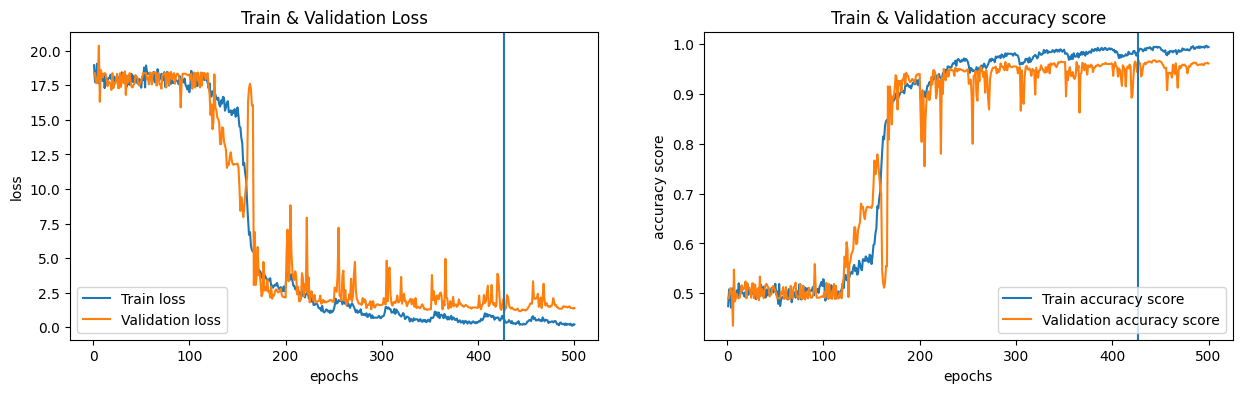

In [7]:
import matplotlib.pyplot as plt
epochs = range(1, len(train_global_log_loss) + 1)

save_dict = torch.load("./model.pt")
best_epoch = save_dict["epoch"]

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(epochs, train_global_log_loss, label='Train loss')
plt.plot(epochs, validation_global_log_loss, label='Validation loss')
plt.axvline(x=best_epoch)

plt.title('Train & Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_global_accuracy, label='Train accuracy score')
plt.plot(epochs, validation_global_accuracy, label='Validation accuracy score')
plt.axvline(x=best_epoch)

plt.title('Train & Validation accuracy score')
plt.xlabel('epochs')
plt.ylabel('accuracy score')
plt.legend()

plt.show()

---

## Performance

In [8]:
load_dict = torch.load("./model.pt")
model = load_dict["model"].cpu()

with torch.no_grad():
    test_one_epoch_prediction = []
    test_one_epoch_target = []
    model.eval()
    print("start test!")
    for x,y in tqdm(test_dataloader):
        prediction_probability = model(x)
        prediction_label = torch.argmax(prediction_probability, dim=1)
        
        test_one_epoch_prediction += prediction_label.detach().numpy().tolist()
        test_one_epoch_target += y.detach().numpy().tolist()
        
    test_accuracy_score = accuracy_score(test_one_epoch_target, test_one_epoch_prediction)
    
    print("test_accuracy_score :", test_accuracy_score)

start test!


100%|█████████████████████████████████████████████████████████████████████████████████| 2/2 [00:07<00:00,  3.90s/it]

test_accuracy_score : 0.96125


## what can we learn from the project? Does it meaningful?
- 수업시간에 배운 local minimum에 빠져서 최적의 함수를 못 찾는 것은 아닐까? 라는 생각을 해봄.
- 검색을 하던 중 scheduler 라는 것을 발견하고 실험을 진행.
- scheduler를 사용하여 learning rate를 한번 크게 줌으로써 local minimum에서 탈출을 시도.
- scheduler를 사용하지 않고 학습을 진행한 결과 - 94% 인 test accuracy score가 96%로 성능 향상
- 이러한 결과가 scheduler의 영향인지 아니면 random initialization에 의한 성능향상인지는 의문이 듬.

Text(0, 0.5, 'learning rate')

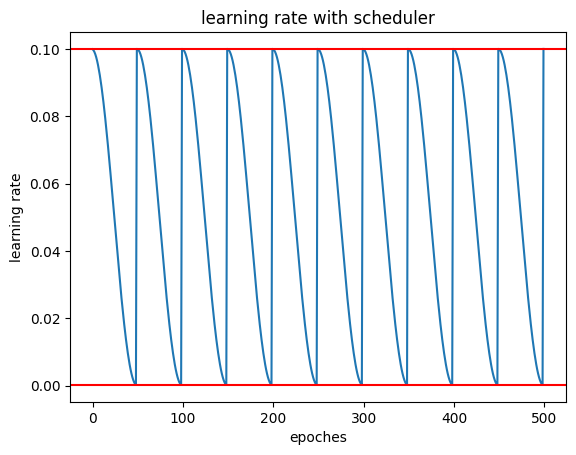

In [10]:
model = Convolution_Neural_Network_Model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=50, T_mult=1, eta_min=0.0001, last_epoch=-1)
lrs = []

for i in range(500):
    scheduler.step()
    lrs.append(optimizer.param_groups[0]["lr"])

plt.plot(lrs)
plt.axhline(y=0.1,color="r")
plt.axhline(y=0.0001,color="r")

plt.title("learning rate with scheduler")
plt.xlabel("epoches")
plt.ylabel('learning rate')